#**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import plotly.express as px
import re


#**LOADING DATASET**

In [ ]:
data=pd.read_csv('/content/HRDataset_v14.csv')

In [ ]:
data.head(3)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3


#**CLEANING DATA**

## **CONVERTING DATATYPES**

In [ ]:
# print the data types of each column
print(data.dtypes)

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [ ]:
# Convert date columns ('DateofHire', 'DateofTermination', 'LastPerformanceReview_Date') to 'datetime64'
date_columns = ['DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']
data[date_columns] = data[date_columns].apply(pd.to_datetime, errors='coerce')

In [ ]:
print(data.dtypes)

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

**CHECK FOR SPECIAL KEYS**

In [ ]:
# Define the special characters pattern
special_characters = r'[!@#$%^&*()_+{}\[\]:;<>,.?~\\|"]'

def highlight_special_characters(val):
    if isinstance(val, str) and re.search(special_characters, val):
        return 'background-color: blue'
    return ''

styled_data = data.style.applymap(highlight_special_characters)
styled_data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,2011-07-05 00:00:00,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.000000,LinkedIn,Exceeds,4.600000,5,0,2019-01-17 00:00:00,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,2015-03-30 00:00:00,2016-06-16 00:00:00,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.000000,Indeed,Fully Meets,4.960000,3,6,2016-02-24 00:00:00,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,2011-07-05 00:00:00,2012-09-24 00:00:00,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.000000,LinkedIn,Fully Meets,3.020000,3,0,2012-05-15 00:00:00,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,2008-01-07 00:00:00,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16.000000,Indeed,Fully Meets,4.840000,5,0,2019-01-03 00:00:00,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,2011-07-11 00:00:00,2016-09-06 00:00:00,return to school,Voluntarily Terminated,Production,Webster Butler,39.000000,Google Search,Fully Meets,5.000000,4,0,2016-02-01 00:00:00,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,2012-01-09 00:00:00,NaT,N/A-StillEmployed,Active,Production,Amy Dunn,11.000000,LinkedIn,Exceeds,5.000000,5,0,2019-01-07 00:00:00,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,2014-11-10 00:00:00,NaT,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.000000,LinkedIn,Fully Meets,3.040000,3,4,2019-01-02 00:00:00,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,2013-09-30 00:00:00,NaT,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.000000,Employee Referral,Fully Meets,5.000000,4,0,2019-02-25 00:00:00,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,02/11/70,F,Single,US Citizen,No,Black or African American,2009-07-06 00:00:00,NaT,N/A-StillEmployed,Active,Production,Brannon Miller,12.000000,Diversity Job Fair,Fully Meets,4.460000,3,0,2019-01-25 00:00:00,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,2015-01-05 00:00:00,NaT,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.000000,Indeed,Fully Meets,5.000000,5,6,2019-02-18 00:00:00,0,16


##**HANDLING DUPLICATES**

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
306    False
307    False
308    False
309    False
310    False
Length: 311, dtype: bool

## **HANDLING MISSING DATA**

**CHECKING MISSING DATA**

In [ ]:
data.isnull().sum().sort_values(ascending=False)

DateofTermination             207
ManagerID                       8
EmpID                           0
RaceDesc                        0
DateofHire                      0
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
Employee_Name                   0
RecruitmentSource               0
PerformanceScore                0
EngagementSurvey                0
EmpSatisfaction                 0
SpecialProjectsCount            0
LastPerformanceReview_Date      0
DaysLateLast30                  0
HispanicLatino                  0
CitizenDesc                     0
MaritalDesc                     0
FromDiversityJobFairID          0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
Salary                          0
Sex                             0
Termd         

Text(0.5, 1.0, 'Missing null values')

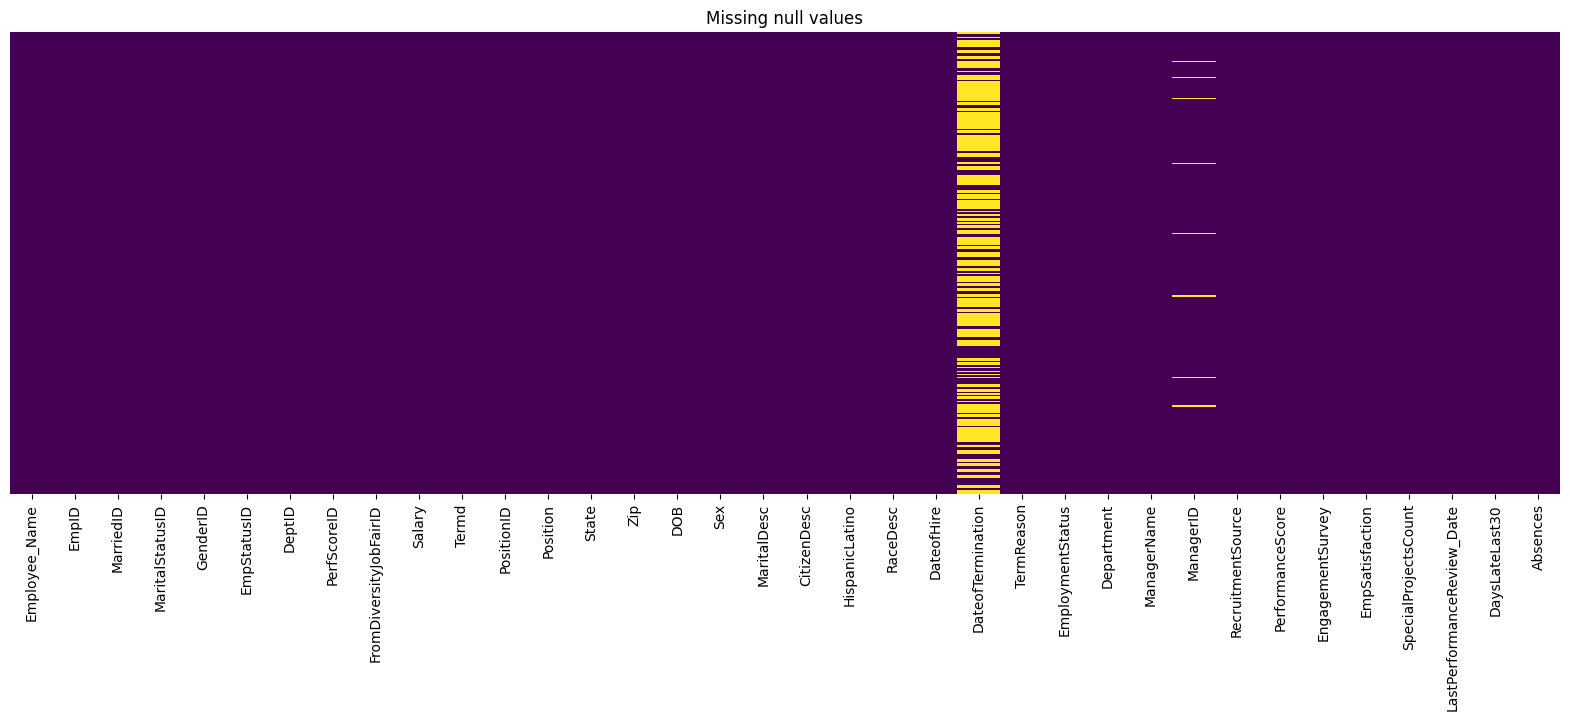

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
sns.heatmap(data.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

Text(0.5, 1.0, 'Quantifying missing data')

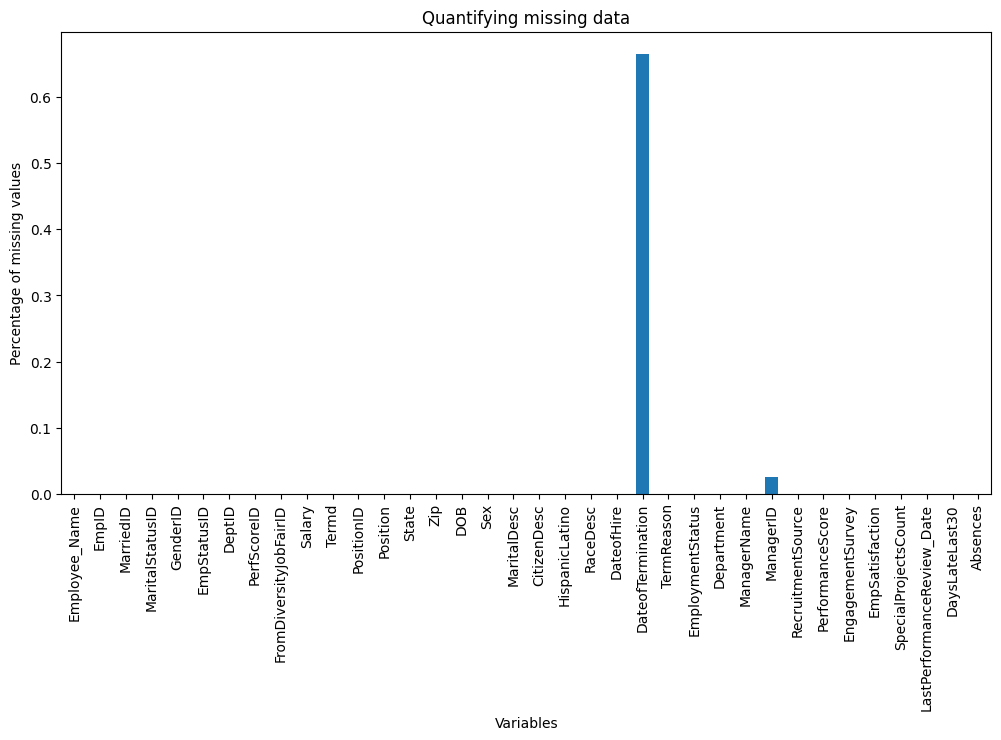

In [ ]:
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

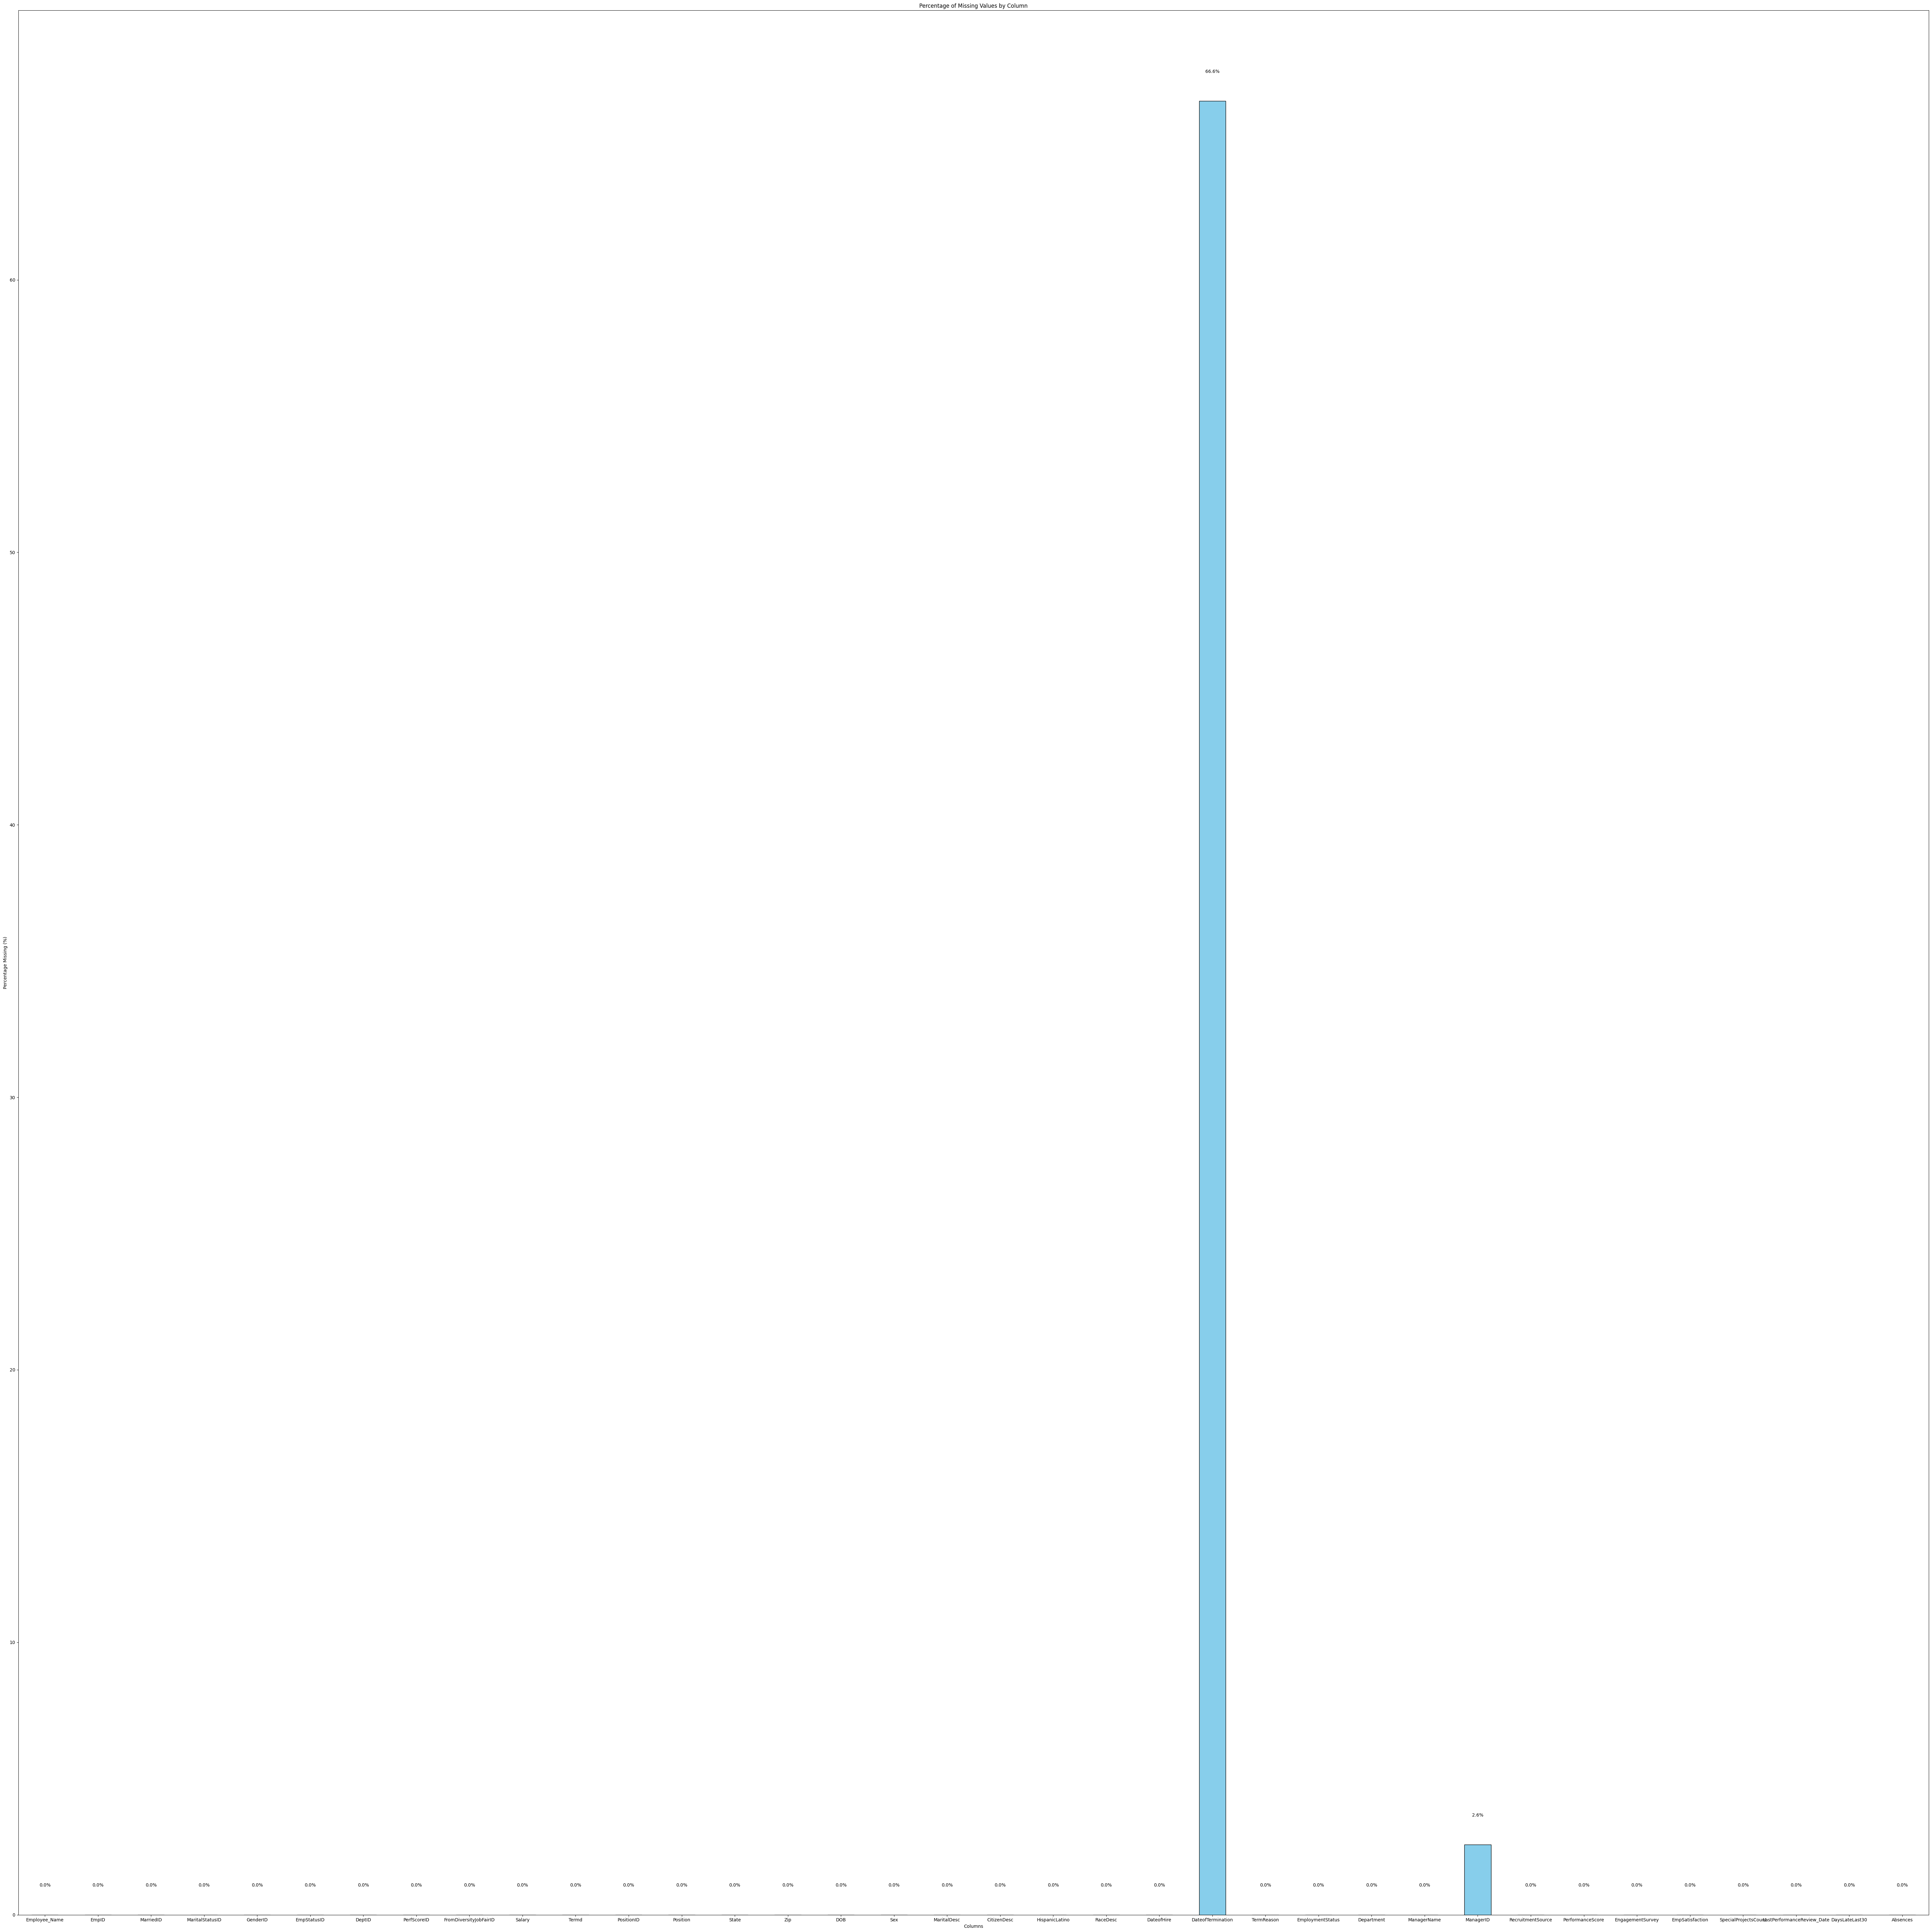

In [ ]:
change_df = pd.DataFrame(data)

# Calculate the percentage of missing values for each column
missing_percentage = (change_df.isnull().sum() / len(data)) * 100

# Create a bar chart to visualize missing percentages with values on top
plt.figure(figsize=(60, 60))
ax = missing_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=0)

# Display the percentage values on top of each bar
for i, v in enumerate(missing_percentage):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Show the chart
plt.show()


**CHECKING NULL VALUES**

In [ ]:
data.isnull().sum().sort_values(ascending=False)

DateofTermination             207
ManagerID                       8
EmpID                           0
RaceDesc                        0
DateofHire                      0
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
Employee_Name                   0
RecruitmentSource               0
PerformanceScore                0
EngagementSurvey                0
EmpSatisfaction                 0
SpecialProjectsCount            0
LastPerformanceReview_Date      0
DaysLateLast30                  0
HispanicLatino                  0
CitizenDesc                     0
MaritalDesc                     0
FromDiversityJobFairID          0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
Salary                          0
Sex                             0
Termd         

In [ ]:
data.isna().any()

Employee_Name                 False
EmpID                         False
MarriedID                     False
MaritalStatusID               False
GenderID                      False
EmpStatusID                   False
DeptID                        False
PerfScoreID                   False
FromDiversityJobFairID        False
Salary                        False
Termd                         False
PositionID                    False
Position                      False
State                         False
Zip                           False
DOB                           False
Sex                           False
MaritalDesc                   False
CitizenDesc                   False
HispanicLatino                False
RaceDesc                      False
DateofHire                    False
DateofTermination              True
TermReason                    False
EmploymentStatus              False
Department                    False
ManagerName                   False
ManagerID                   

In [ ]:
data.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

**METHOD 4- MISSING VALUE TRANSFORMATION**


In [ ]:
data.dropna(subset=['ManagerID'], inplace=True)

In [ ]:
# Impute missing values in the "DateofTermination" column with 0
data['DateofTermination'].fillna(0, inplace=True)

In [ ]:
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2019-02-28,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,2015-09-02,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2019-02-21,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2019-02-01,0,11


In [ ]:
data.isnull().sum().sort_values(ascending=False)

Employee_Name                 0
EmpID                         0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialProjectsCount          0
LastPerformanceReview_Date    0
DaysLateLast30                0
HispanicLatino                0
CitizenDesc                   0
MaritalDesc                   0
FromDiversityJobFairID        0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
Salary                        0
Sex                           0
Termd                         0
PositionID                    0
Position

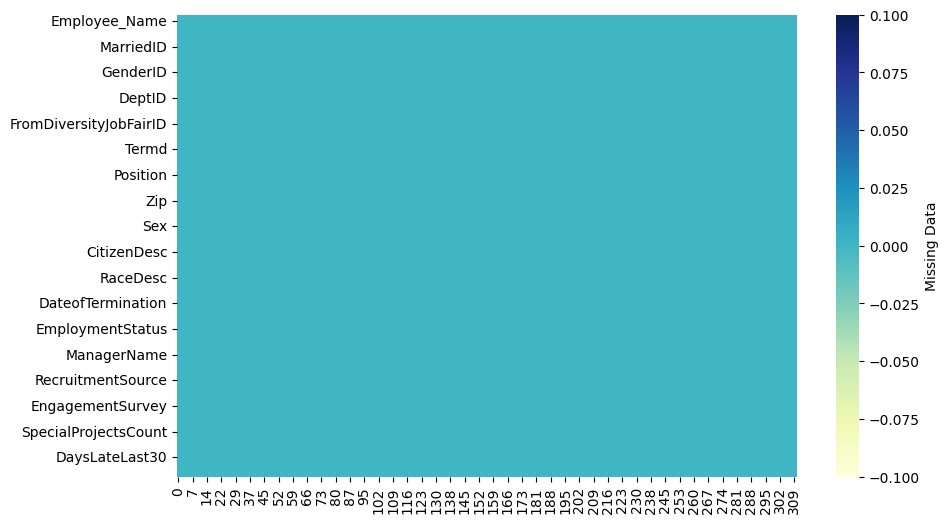

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

## OUTLIERS

IDENTIFIYING OUTLIERS

In [ ]:
data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,10156.409241,0.402640,0.815182,0.435644,2.409241,4.600660,2.973597,0.095710,69292.316832,0.343234,16.775578,6673.544554,14.570957,4.106139,3.887789,1.250825,0.425743,10.267327
std,90.123632,0.491241,0.941413,0.496661,1.809883,1.095868,0.591856,0.294679,25406.092767,0.475574,6.289574,17114.860678,8.078306,0.794589,0.910179,2.371839,1.309769,5.883906
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1040.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10079.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55633.000000,0.000000,18.000000,1901.500000,10.000000,3.675000,3.000000,0.000000,0.000000,5.000000
50%,10157.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62910.000000,0.000000,19.000000,2130.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10234.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72331.000000,1.000000,20.000000,2359.500000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


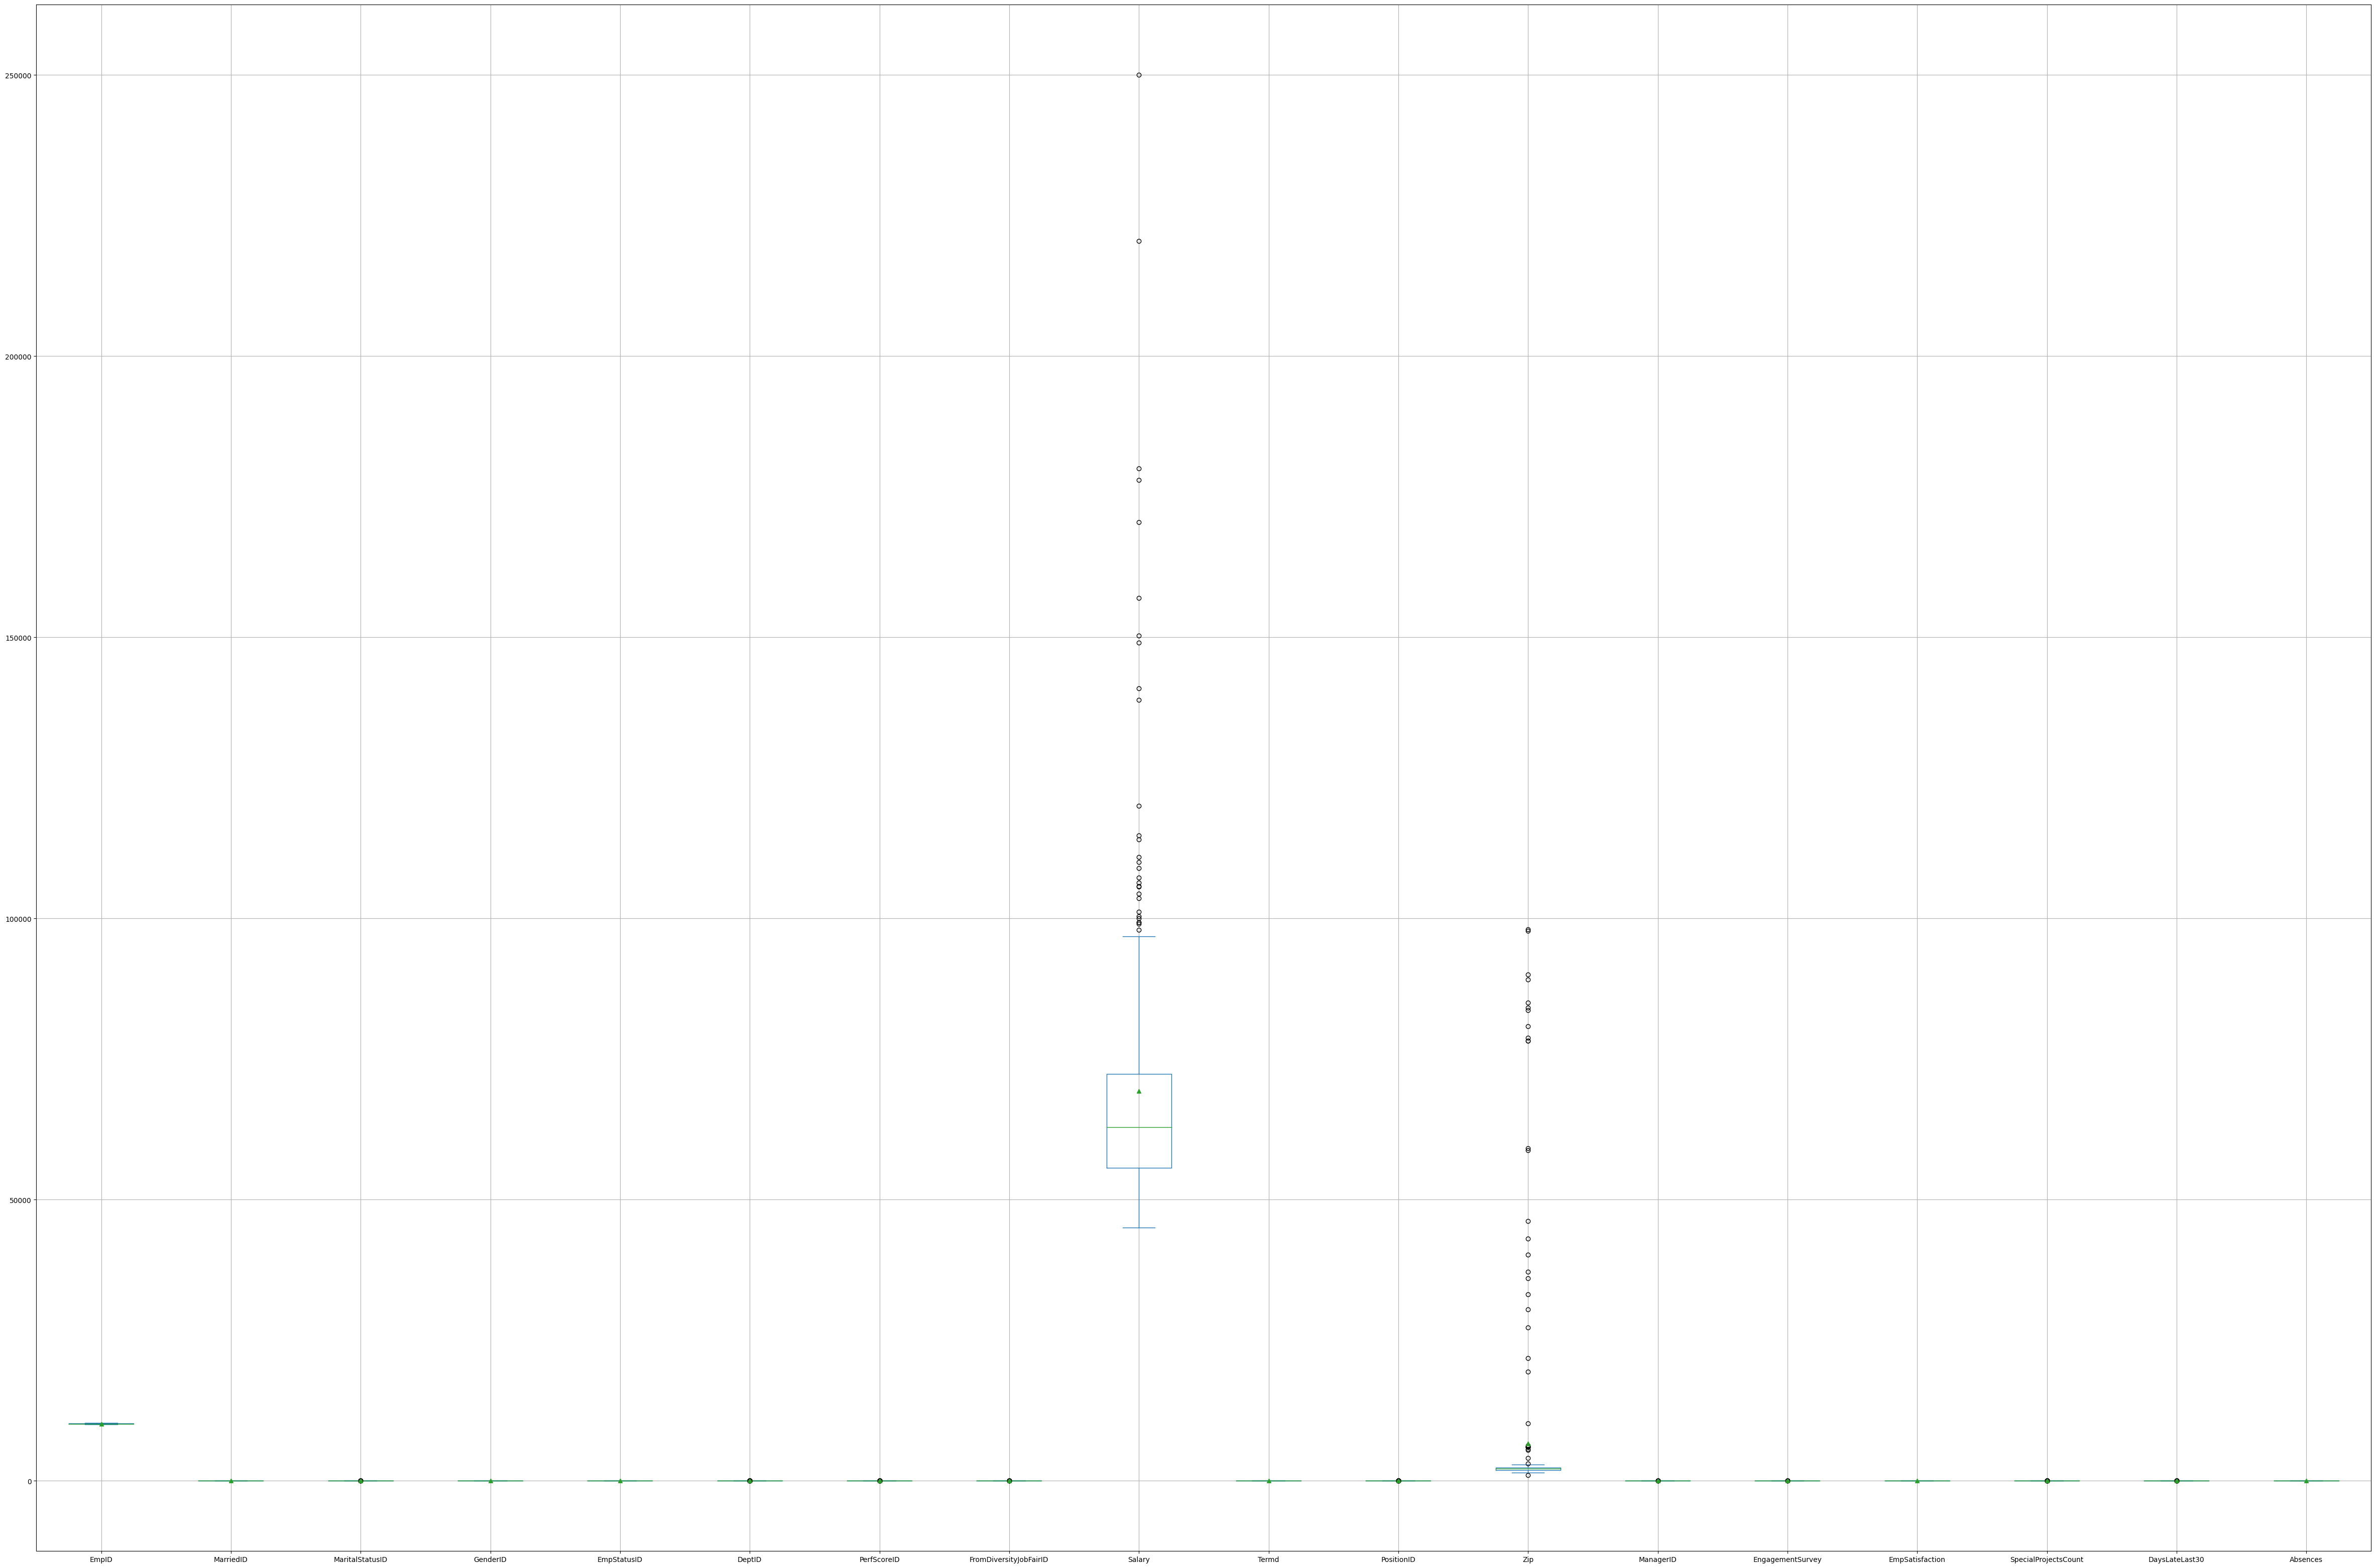

In [ ]:
#detect with boxplot
ax = data.plot.box(figsize=(60,40), showmeans=True)
ax.grid()

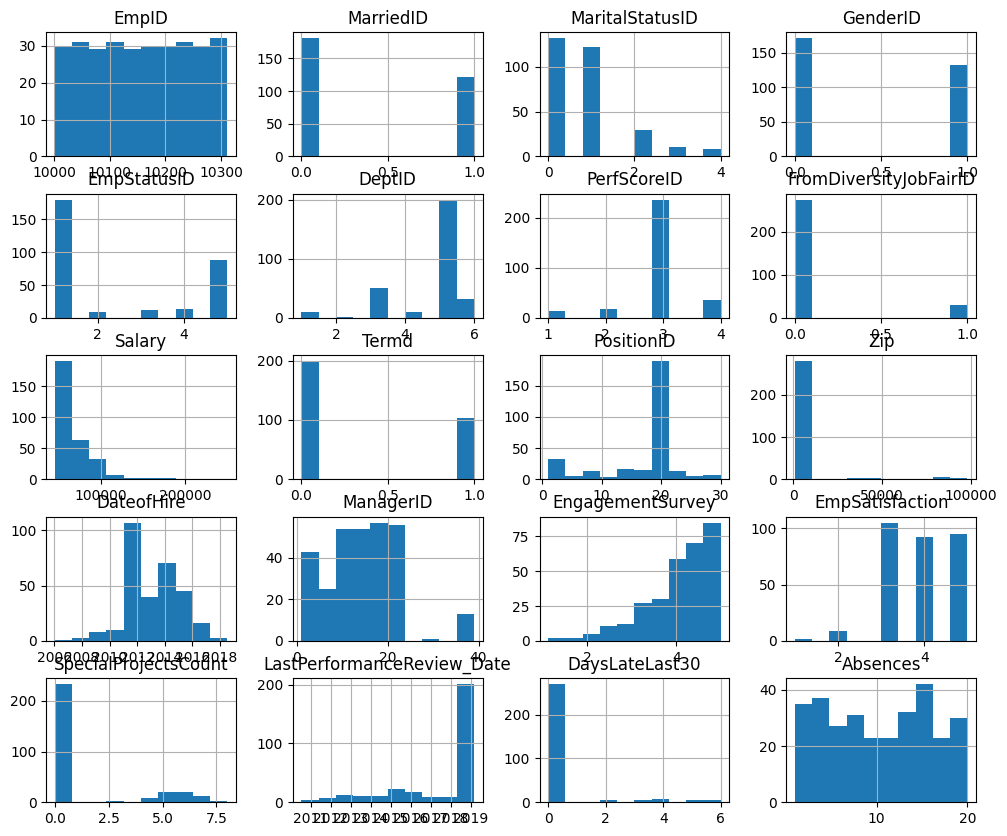

In [ ]:
ax = data.hist(figsize=(12, 10))

In [ ]:
print(change_df['Salary'].skew())
data['Salary'].describe()

3.30618080924006


count       303.000000
mean      69292.316832
std       25406.092767
min       45046.000000
25%       55633.000000
50%       62910.000000
75%       72331.000000
max      250000.000000
Name: Salary, dtype: float64

HANDLING OUTLIERS

In [ ]:
data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,10156.409241,0.402640,0.815182,0.435644,2.409241,4.600660,2.973597,0.095710,69292.316832,0.343234,16.775578,6673.544554,14.570957,4.106139,3.887789,1.250825,0.425743,10.267327
std,90.123632,0.491241,0.941413,0.496661,1.809883,1.095868,0.591856,0.294679,25406.092767,0.475574,6.289574,17114.860678,8.078306,0.794589,0.910179,2.371839,1.309769,5.883906
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1040.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10079.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55633.000000,0.000000,18.000000,1901.500000,10.000000,3.675000,3.000000,0.000000,0.000000,5.000000
50%,10157.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62910.000000,0.000000,19.000000,2130.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10234.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72331.000000,1.000000,20.000000,2359.500000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [ ]:
data.shape

(303, 36)

In [ ]:
# Assuming you have your DataFrame named change_df

# Take the natural logarithm of the "Salary" column and replace the original values
data['Salary'] = np.log(data['Salary'])

# Verify the changes in the original DataFrame
print(data.head())

# Create a new DataFrame with the transformed variable
transformed_data = data.copy()

# Verify the new DataFrame
print(transformed_data.head())


              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID     Salary  ...  \
0            1       5            4                       0  11.043018  ...   
1            5       3            3                       0  11.556339  ...   
2            5       5            3                       0  11.081450  ...   
3            1       5            3                       0  11.082004  ...   
4            5       5            3                       0  10.836144  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0

In [ ]:
transformed_data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,11.043018,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,11.556339,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,11.081450,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,11.082004,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,10.836144,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,11.095787,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2019-02-28,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,10.789587,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,2015-09-02,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,12.303426,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2019-02-21,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,11.399667,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2019-02-01,0,11


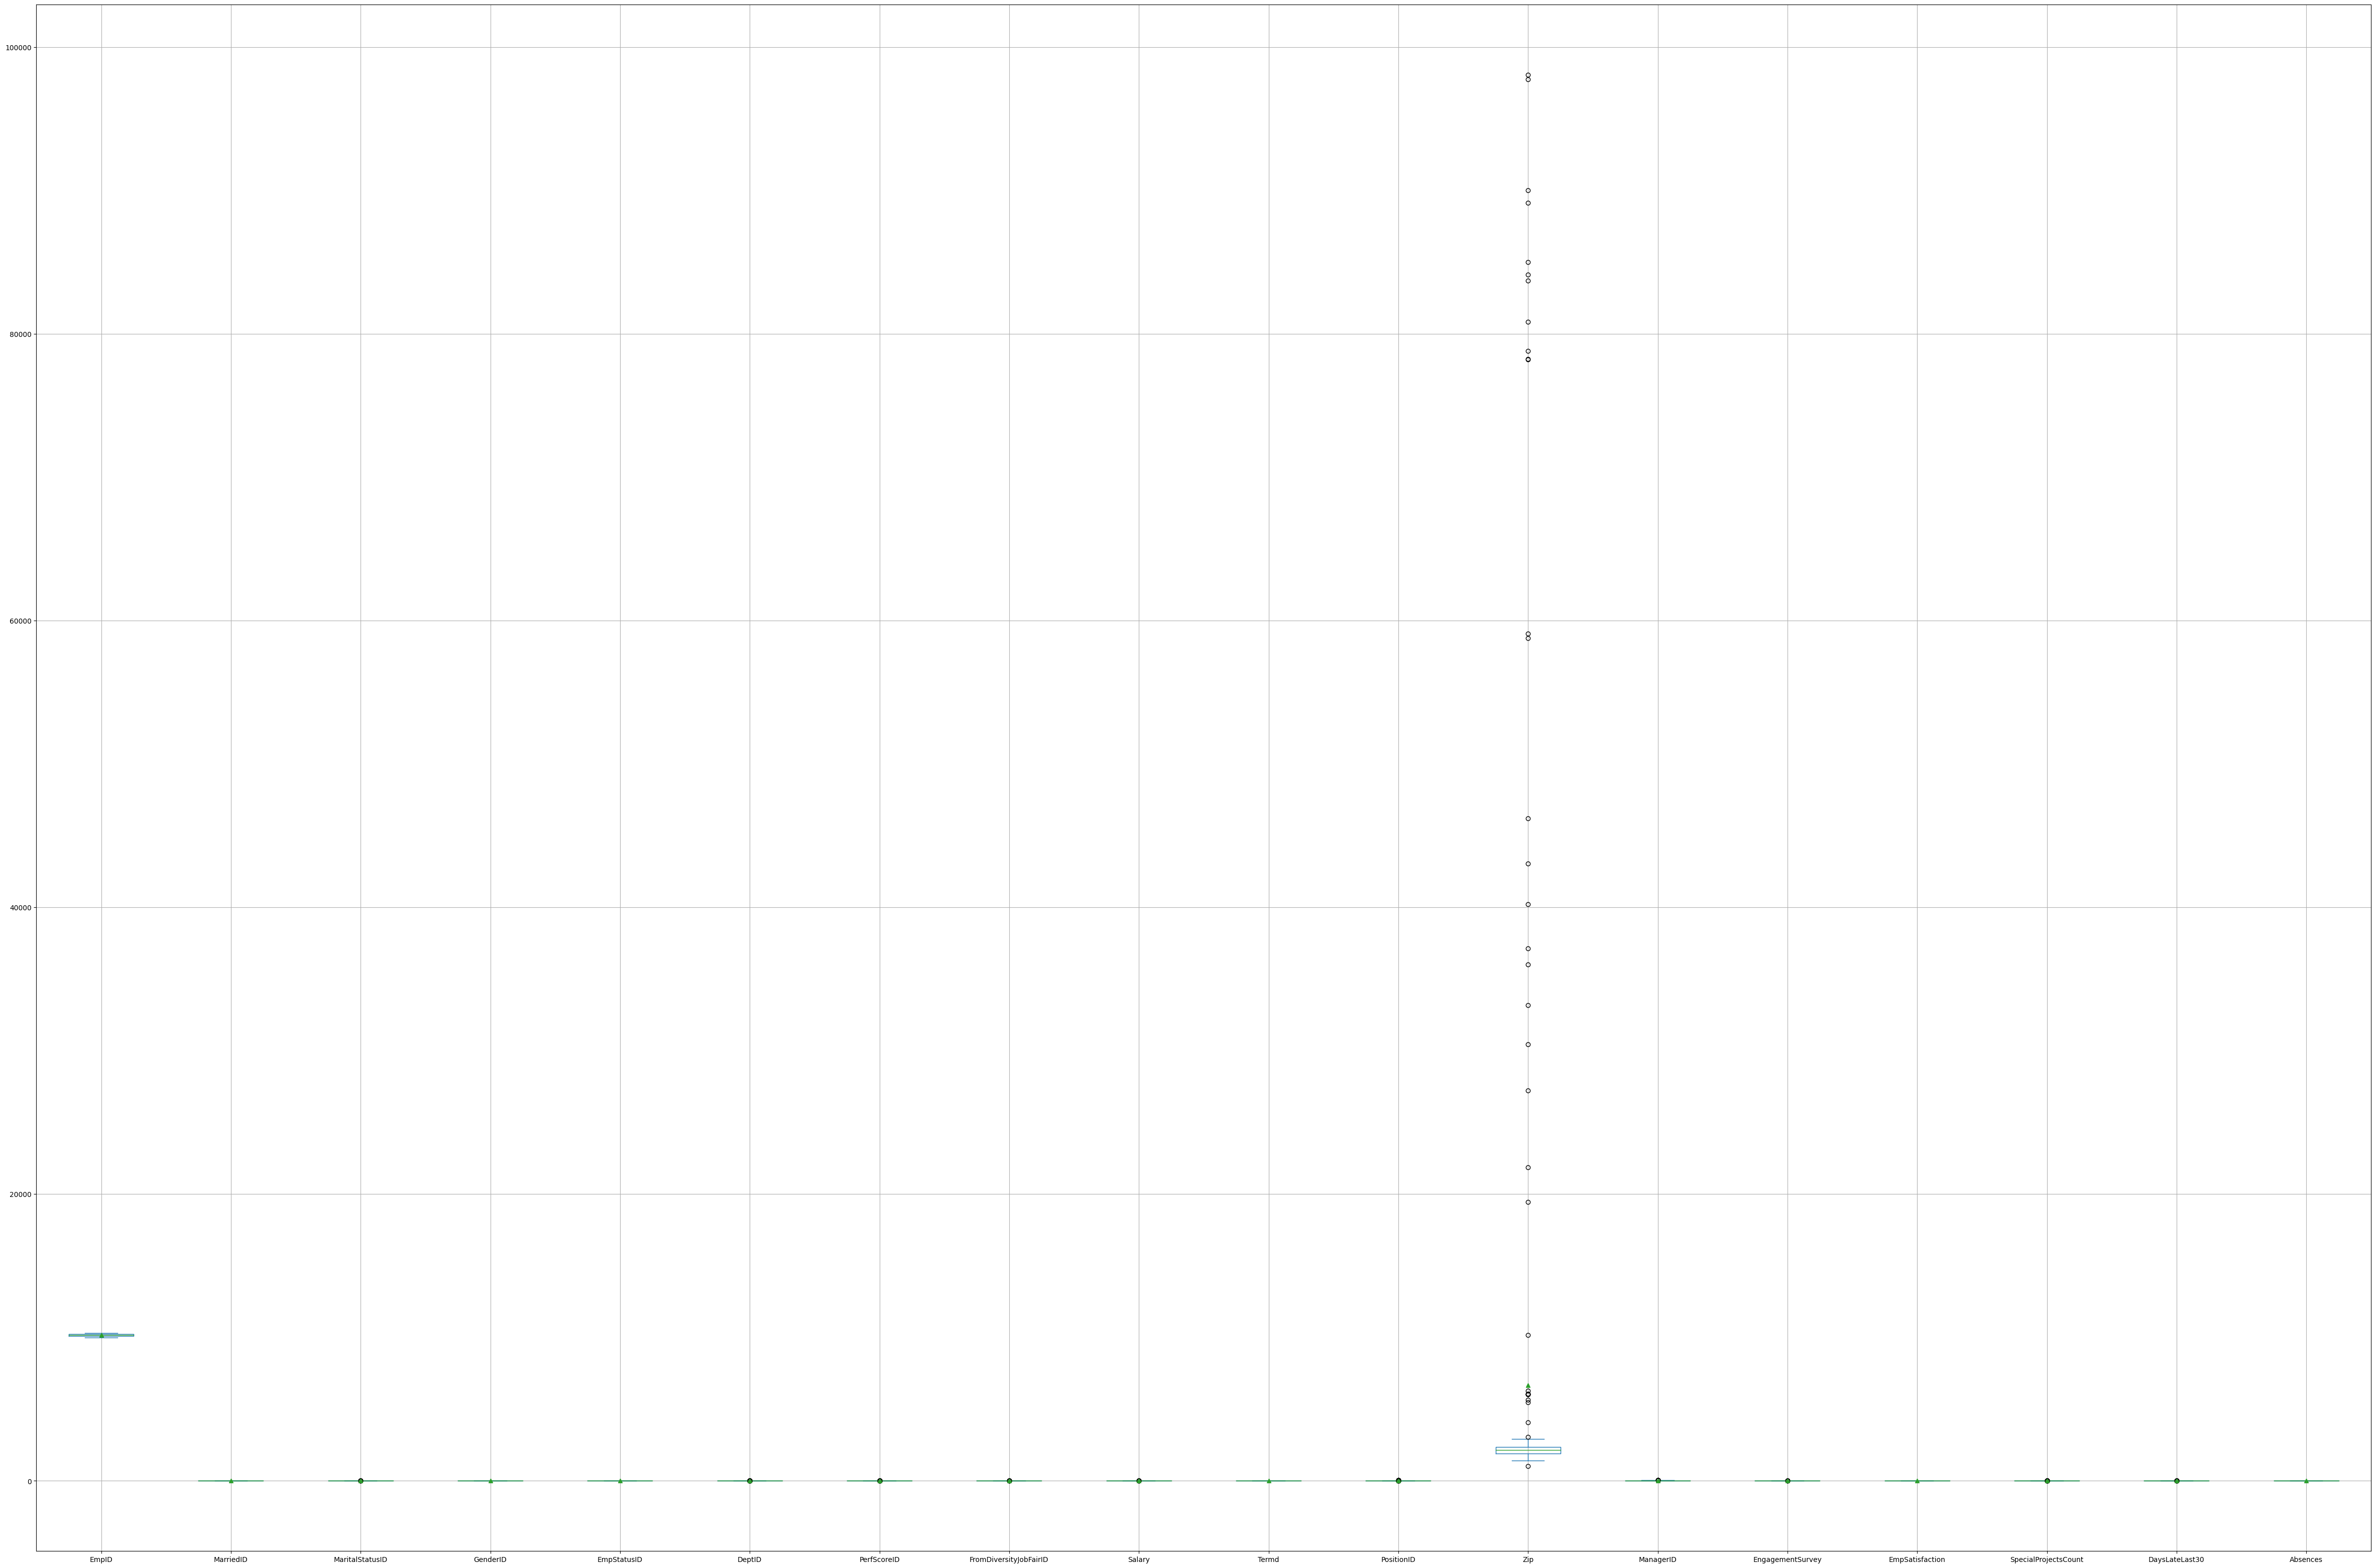

In [ ]:
#detect with boxplot
ax = transformed_data.plot.box(figsize=(60,40), showmeans=True)
ax.grid()

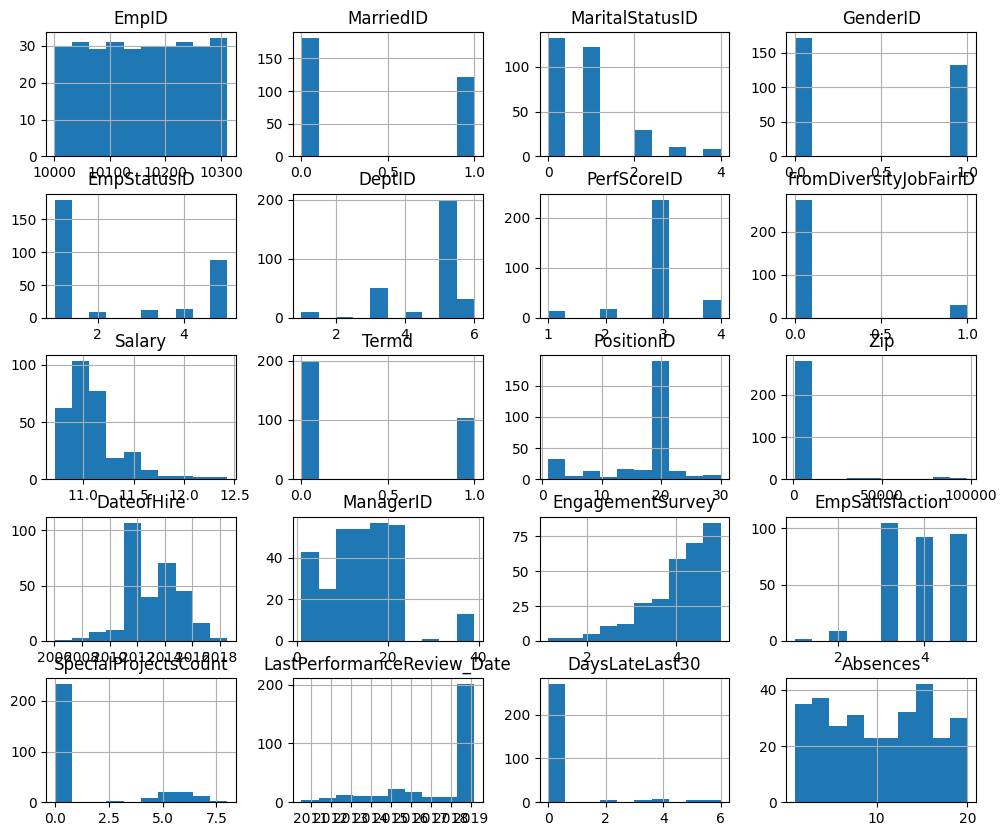

In [ ]:
ax = transformed_data.hist(figsize=(12, 10))

In [ ]:
transformed_data.shape

(303, 36)

# CHANGING TO NEW DATAFRAME

In [ ]:
df = transformed_data

# ANALYSING WITH QUESTIONS

Count of employees in each position. (Allows to check vacancies and stuff)

In [ ]:
position_counts = df['Position'].value_counts()
print(position_counts)

Production Technician I         133
Production Technician II         53
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. DBA                           2
IT Manager - DB                   2
Sr. Accountant                    2
Director of Operations            1
Shared Services Manager           1
Data Analyst                      1
Data Architect                    1
Principal Data Architect          1
IT Manager - Infra                1
President & CEO                   1
Enterprise Architect              1
BI Director                       1
Director of Sales           


The organization's workforce is distributed across various positions, each contributing to the company's operations and success. By analyzing the count of employees in each position, we can gain valuable insights into the company's structure, staffing levels, and potential areas of interest or concern.

Here is a breakdown of the employee count in each position:

1. **Production Technician I (133 employees)**: This position has the highest number of employees, indicating its importance in the production department.

2. **Production Technician II (53 employees)**: The presence of a significant number of employees in this role suggests the need for a skilled workforce in the production sector.

3. **Area Sales Manager (27 employees)**: With a sizable team of Area Sales Managers, the company likely emphasizes sales and market expansion.

4. **Production Manager (14 employees)**: Production Managers play a crucial role in overseeing production processes, and their presence in significant numbers signifies the focus on efficient production.

5. **Software Engineer (10 employees)**: The software engineering team consists of professionals contributing to software development projects.

6. **IT Support (8 employees)**: This team is responsible for providing IT assistance to employees, and its size reflects the need for technical support.

7. **Data Analyst (7 employees)**: Data Analysts are key in extracting insights from data, and their presence indicates an interest in data-driven decision-making.

8. **Sr. Network Engineer, Database Administrator, Network Engineer (5 employees each)**: These roles highlight the emphasis on network and database management.

9. **BI Developer (4 employees)**: Business Intelligence Developers play a role in creating data-driven solutions for the organization.

10. **Senior BI Developer (3 employees)**: A more specialized role within Business Intelligence.

11. **Administrative Assistant, Sales Manager, Accountant I (3 employees each)**: These roles support various administrative and financial functions within the company.

12. **Sr. DBA, IT Manager - DB, Sr. Accountant (2 employees each)**: Senior roles in database administration and IT management.

13. **Director of Operations, Shared Services Manager, Data Analyst, Data Architect, Principal Data Architect, IT Manager - Infra, President & CEO, Enterprise Architect, BI Director, Director of Sales, IT Director, IT Manager - Support, Software Engineering Manager, CIO (1 employee each)**: These roles represent leadership positions, suggesting a hierarchy within the organization.

This breakdown provides valuable insights into the distribution of employees across different positions, helping identify areas with high workforce demand, potential areas for future growth, and the diversity of roles contributing to the company's success. It can aid in workforce planning, resource allocation, and talent management strategies.

Count of employees in every state.

In [ ]:
state_counts = df['State'].value_counts()
print(state_counts)

MA    268
CT      6
TX      3
VT      2
UT      1
AZ      1
ND      1
OR      1
MT      1
NV      1
ID      1
KY      1
NC      1
FL      1
GA      1
CO      1
NY      1
PA      1
RI      1
NH      1
TN      1
IN      1
OH      1
CA      1
WA      1
AL      1
VA      1
ME      1
Name: State, dtype: int64



The distribution of employees across different states provides valuable insights into the geographical representation of the workforce. It can offer information on regional operations, expansion, and the company's presence in various locations. Here is a breakdown of the employee count in each state:

1. **Massachusetts (MA - 268 employees)**: The state with the highest employee count, likely indicating the company's headquarters or a significant operational base.

2. **Connecticut (CT - 6 employees)**: While smaller in number compared to Massachusetts, Connecticut still has a notable employee presence, possibly signifying a regional office or branch.

3. **Texas (TX - 3 employees)**: A smaller but still significant employee count in Texas may suggest regional operations or remote team members.

4. **Vermont (VT - 2 employees)**: Vermont has a minor employee presence, possibly related to specific project requirements or remote work arrangements.

5. **Utah (UT - 1 employee)**: Utah has a single employee, indicating a limited or specialized role in the state.

6. **Arizona (AZ - 1 employee)**: Similar to Utah, Arizona has one employee, potentially linked to a specific project or function.

7. **North Dakota (ND - 1 employee)**: North Dakota's lone employee might be involved in a unique aspect of the company's operations.

8. **Oregon (OR - 1 employee)**: Oregon has one employee, suggesting a minimal but essential presence in the state.

9. **Montana (MT - 1 employee)**: Montana's employee count is minimal, possibly related to specialized tasks or remote work.

10. **Nevada (NV - 1 employee)**: Nevada has one employee, indicating a limited presence.

11. **Idaho (ID - 1 employee)**: Idaho also has one employee, potentially involved in specific projects or functions.

12. **Kentucky (KY - 1 employee)**: Kentucky's employee count is minimal, potentially serving a unique role within the organization.

13. **North Carolina (NC - 1 employee)**: North Carolina's single employee may be associated with specific tasks or responsibilities.

14. **Florida (FL - 1 employee)**: Florida has one employee, possibly contributing to the company's operations or projects.

15. **Georgia (GA - 1 employee)**: Georgia's employee count is minimal, possibly linked to a specific function or initiative.

16. **Colorado (CO - 1 employee)**: Colorado has one employee, indicating a limited presence in the state.

17. **New York (NY - 1 employee)**: New York's single employee may serve a unique role or purpose within the organization.

18. **Pennsylvania (PA - 1 employee)**: Pennsylvania has one employee, potentially involved in specific projects or functions.

19. **Rhode Island (RI - 1 employee)**: Rhode Island's employee count is minimal, likely associated with specific tasks or projects.

20. **New Hampshire (NH - 1 employee)**: New Hampshire has one employee, possibly serving a specialized role.

21. **Tennessee (TN - 1 employee)**: Tennessee's employee count is minimal, potentially associated with unique responsibilities.

22. **Indiana (IN - 1 employee)**: Indiana has one employee, indicating a limited presence in the state.

23. **Ohio (OH - 1 employee)**: Ohio's employee count is minimal, possibly serving a specific role.

24. **California (CA - 1 employee)**: While California typically has a large workforce, the presence of one employee suggests a remote worker or a specialized role.

25. **Washington (WA - 1 employee)**: Washington has one employee, potentially associated with specific projects or functions.

26. **Alabama (AL - 1 employee)**: Alabama's employee count is minimal, likely serving a unique role.

27. **Virginia (VA - 1 employee)**: Virginia has one employee, indicating a limited presence in the state.

28. **Maine (ME - 1 employee)**: Maine's employee count is minimal, potentially involved in specialized tasks.

This distribution of employees across states reflects the company's regional presence, remote work arrangements, or specific roles within the organization. It can inform decisions related to regional expansion, remote work policies, and resource allocation based on geographical needs.

Female-Male Gender Ratio within the company.

In [ ]:
gender_counts = df['Sex'].value_counts()
print(gender_counts)

F     171
M     132
Name: Sex, dtype: int64



The gender ratio within a company is a crucial metric for assessing workforce diversity and inclusivity. In this case, the company has provided the following gender distribution:

- **Females (F - 171 employees)**: There are 171 female employees in the organization.

- **Males (M - 132 employees)**: The company employs 132 male individuals.

This gender ratio reflects the composition of the workforce in terms of gender. Achieving a balanced gender ratio is often an important goal for organizations, as it promotes diversity, encourages a variety of perspectives, and supports an inclusive workplace culture. Monitoring and maintaining gender balance is an ongoing effort for many companies to ensure equal opportunities and representation across all levels of the organization.

The specific gender distribution figures provided here can serve as a basis for further discussions and initiatives related to gender diversity and inclusivity within the company. Efforts to promote gender equality and provide a supportive environment for all employees can have a positive impact on the organization's overall success and culture.

Employees count under each manager

In [ ]:
manager_counts = df['ManagerName'].value_counts()
print(manager_counts)

Michael Albert        22
Kissy Sullivan        22
Elijiah Gray          22
Kelley Spirea         22
Brannon Miller        22
Ketsia Liebig         21
David Stanley         21
Amy Dunn              21
Janet King            19
Simon Roup            17
Peter Monroe          14
John Smith            14
Webster Butler        13
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Brandon R. LeBlanc     7
Jennifer Zamora        7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: ManagerName, dtype: int64



The distribution of employees under each manager provides insight into the management structure within the company and the size of the teams led by different managers. Here is a breakdown of the employee count under each manager:

1. **Michael Albert (22 employees)**: Michael Albert leads a team of 22 employees, indicating a significant managerial role.

2. **Kissy Sullivan (22 employees)**: Kissy Sullivan manages a team of 22 employees, suggesting a similar role to Michael Albert.

3. **Elijiah Gray (22 employees)**: Elijiah Gray also manages a team of 22 employees, showing a similar-sized responsibility.

4. **Kelley Spirea (22 employees)**: Kelley Spirea oversees a team of 22 employees, reflecting a substantial managerial role.

5. **Brannon Miller (22 employees)**: Brannon Miller leads a team of 22 employees, indicating a similar managerial responsibility to others.

6. **Ketsia Liebig (21 employees)**: Ketsia Liebig manages a team of 21 employees, showing a slightly smaller team size.

7. **David Stanley (21 employees)**: David Stanley leads a team of 21 employees, similar to Ketsia Liebig's role.

8. **Amy Dunn (21 employees)**: Amy Dunn manages a team of 21 employees, suggesting a similar-sized responsibility.

9. **Janet King (19 employees)**: Janet King oversees a team of 19 employees, reflecting a moderately sized managerial role.

10. **Simon Roup (17 employees)**: Simon Roup manages a team of 17 employees, indicating a moderately sized responsibility.

11. **Peter Monroe (14 employees)**: Peter Monroe leads a team of 14 employees, reflecting a moderate managerial role.

12. **John Smith (14 employees)**: John Smith also manages a team of 14 employees, showing a similar-sized responsibility to Peter Monroe.

13. **Webster Butler (13 employees)**: Webster Butler oversees a team of 13 employees, indicating a moderate managerial role.

14. **Lynn Daneault (13 employees)**: Lynn Daneault manages a team of 13 employees, suggesting a role similar in size to Webster Butler's.

15. **Alex Sweetwater (9 employees)**: Alex Sweetwater leads a team of 9 employees, reflecting a smaller-sized managerial role.

16. **Brian Champaigne (8 employees)**: Brian Champaigne oversees a team of 8 employees, indicating a smaller managerial responsibility.

17. **Brandon R. LeBlanc (7 employees)**: Brandon R. LeBlanc manages a team of 7 employees, showing a relatively small-sized managerial role.

18. **Jennifer Zamora (7 employees)**: Jennifer Zamora also leads a team of 7 employees, reflecting a managerial responsibility of similar size to Brandon R. LeBlanc.

19. **Eric Dougall (4 employees)**: Eric Dougall manages a team of 4 employees, indicating a relatively small-sized managerial role.

20. **Debra Houlihan (3 employees)**: Debra Houlihan oversees a team of 3 employees, suggesting a small managerial responsibility.

21. **Board of Directors (2 employees)**: The Board of Directors, as a governing body, includes 2 members responsible for high-level decision-making.

This breakdown of employee counts under each manager provides insights into the managerial hierarchy, team sizes, and the distribution of responsibilities within the organization. It can help in evaluating the effectiveness of different management teams and identifying areas where additional support or resources may be needed.

Dept wise count of employees.

In [ ]:
dept_counts = df['Department'].value_counts()
print(dept_counts)

Production              201
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64



The department-wise count of employees provides a snapshot of how the organization's workforce is distributed across different functional areas. Here is a breakdown of the employee count in each department:

1. **Production (201 employees)**: The Production department has the largest number of employees, indicating a significant workforce dedicated to manufacturing and production activities. This suggests a focus on operational excellence and meeting production demands.

2. **IT/IS (50 employees)**: The IT/IS department has a substantial employee count, emphasizing the importance of information technology and information systems in supporting the company's operations. It suggests a strong technology infrastructure and support team.

3. **Sales (31 employees)**: The Sales department has a considerable workforce, signifying the company's focus on sales and revenue generation. This may include sales representatives, account managers, and sales support roles.

4. **Software Engineering (11 employees)**: The Software Engineering department consists of a dedicated team of software developers and engineers. This suggests a focus on software development and technology-driven solutions.

5. **Admin Offices (9 employees)**: Admin Offices have a moderate employee count, likely covering administrative and support functions across various departments.

6. **Executive Office (1 employee)**: The Executive Office includes a single employee, reflecting high-level executives or senior leadership responsible for strategic decision-making and organizational governance.

This distribution of employees across different departments provides insights into the organizational structure, highlighting the areas of emphasis, and the importance of each department within the company. It can inform decisions related to resource allocation, department-specific strategies, and workforce planning to support the company's overall objectives and goals.

Age Distribution of employees.



<ipython-input-38-96e33240f296>:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Age'] = (pd.to_datetime('now') - df['DOB']).astype('<m8[Y]')


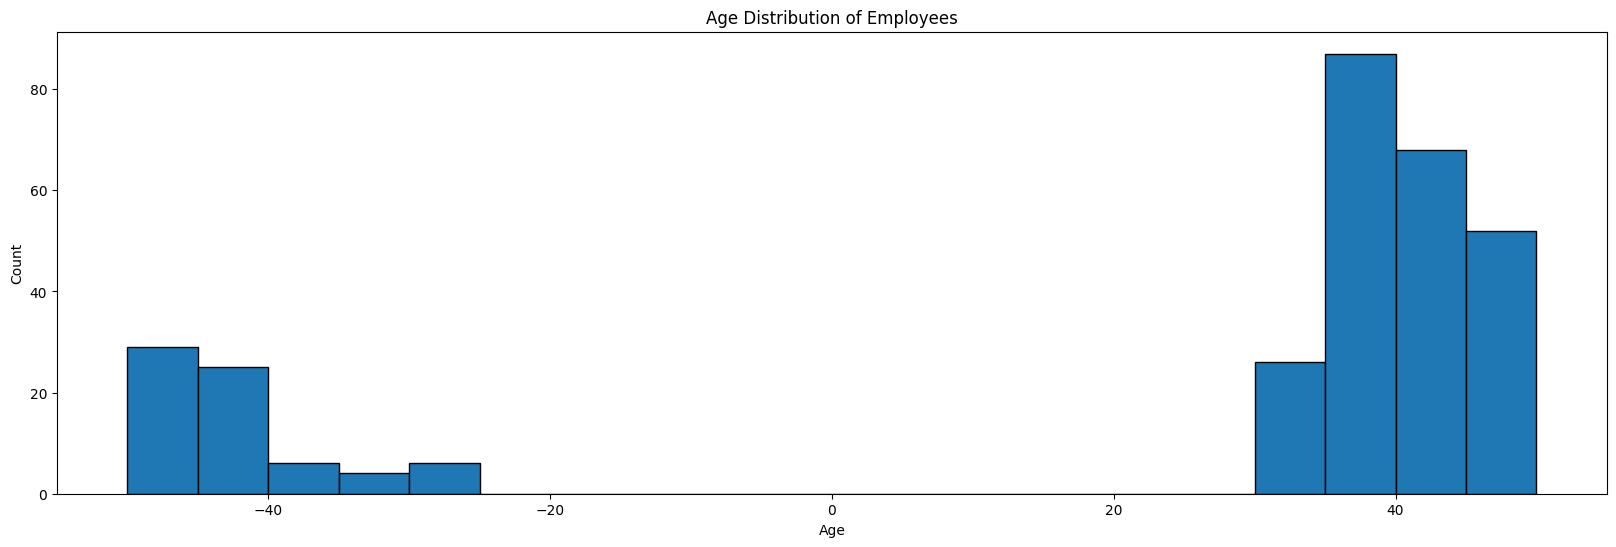

In [ ]:
# Convert "DOB" to datetime
df['DOB'] = pd.to_datetime(df['DOB'])

# Calculate age
df['Age'] = (pd.to_datetime('now') - df['DOB']).astype('<m8[Y]')

# Plot age distribution
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Employees')
plt.show()

In [ ]:
# Convert "DOB" to datetime
df['DOB'] = pd.to_datetime(df['DOB'])

# Calculate age
df['Age'] = (pd.to_datetime('now') - df['DOB']).astype('<m8[Y]')

# Calculate metrics
mean_age = df['Age'].mean()
median_age = df['Age'].median()
std_dev_age = df['Age'].std()
min_age = df['Age'].min()
max_age = df['Age'].max()
age_quartiles = df['Age'].quantile([0.25, 0.5, 0.75])

print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("Standard Deviation of Age:", std_dev_age)
print("Minimum Age:", min_age)
print("Maximum Age:", max_age)
print("25th Percentile (Q1):", age_quartiles[0.25])
print("50th Percentile (Median, Q2):", age_quartiles[0.5])
print("75th Percentile (Q3):", age_quartiles[0.75])


Mean Age: 21.155115511551156
Median Age: 37.0
Standard Deviation of Age: 35.380603694462685
Minimum Age: -50.0
Maximum Age: 50.0
25th Percentile (Q1): 33.0
50th Percentile (Median, Q2): 37.0
75th Percentile (Q3): 43.0


<ipython-input-48-7565888c407f>:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Age'] = (pd.to_datetime('now') - df['DOB']).astype('<m8[Y]')



The age distribution of employees provides valuable information about the demographics of the workforce. Here are key statistics related to the age distribution:

- **Mean Age (Average Age): 21.16 years**: The mean age represents the arithmetic average of all employees' ages. In this case, the mean age is relatively low, suggesting the presence of some outliers or unusual data points that are affecting the average.

- **Median Age: 37 years**: The median age is the middle value in the ordered list of employee ages. It's a robust measure of central tendency and is not as sensitive to outliers as the mean. A median age of 37 suggests that roughly half of the employees are below 37 years old, and half are above 37.

- **Standard Deviation of Age: 35.38 years**: The standard deviation measures the dispersion or spread of data points around the mean. A higher standard deviation indicates greater variability in employee ages. In this case, the relatively high standard deviation suggests a wide age range within the workforce.

- **Minimum Age: -50 years**: The minimum age indicates the lowest age value in the dataset. The presence of a negative age value may be a data entry error or anomaly that should be investigated.

- **Maximum Age: 50 years**: The maximum age represents the highest age value in the dataset, indicating the oldest employee.

- **25th Percentile (Q1): 33 years**: The 25th percentile, also known as the first quartile, is the age below which 25% of employees fall. In this case, 25% of employees are younger than 33 years old.

- **50th Percentile (Median, Q2): 37 years**: The 50th percentile is the same as the median age, which was previously discussed.

- **75th Percentile (Q3): 43 years**: The 75th percentile, also known as the third quartile, is the age below which 75% of employees fall. In this case, 75% of employees are younger than 43 years old.

The age distribution statistics indicate that the workforce has a wide range of ages, with a mean age that may be influenced by outliers. The median provides a more robust measure of central tendency. Additionally, the presence of a negative minimum age should be reviewed and corrected if it represents a data anomaly. The age distribution can inform HR practices, such as age diversity, succession planning, and retirement planning within the organization.

Probability Distribution of Pay-Rate among various employees.

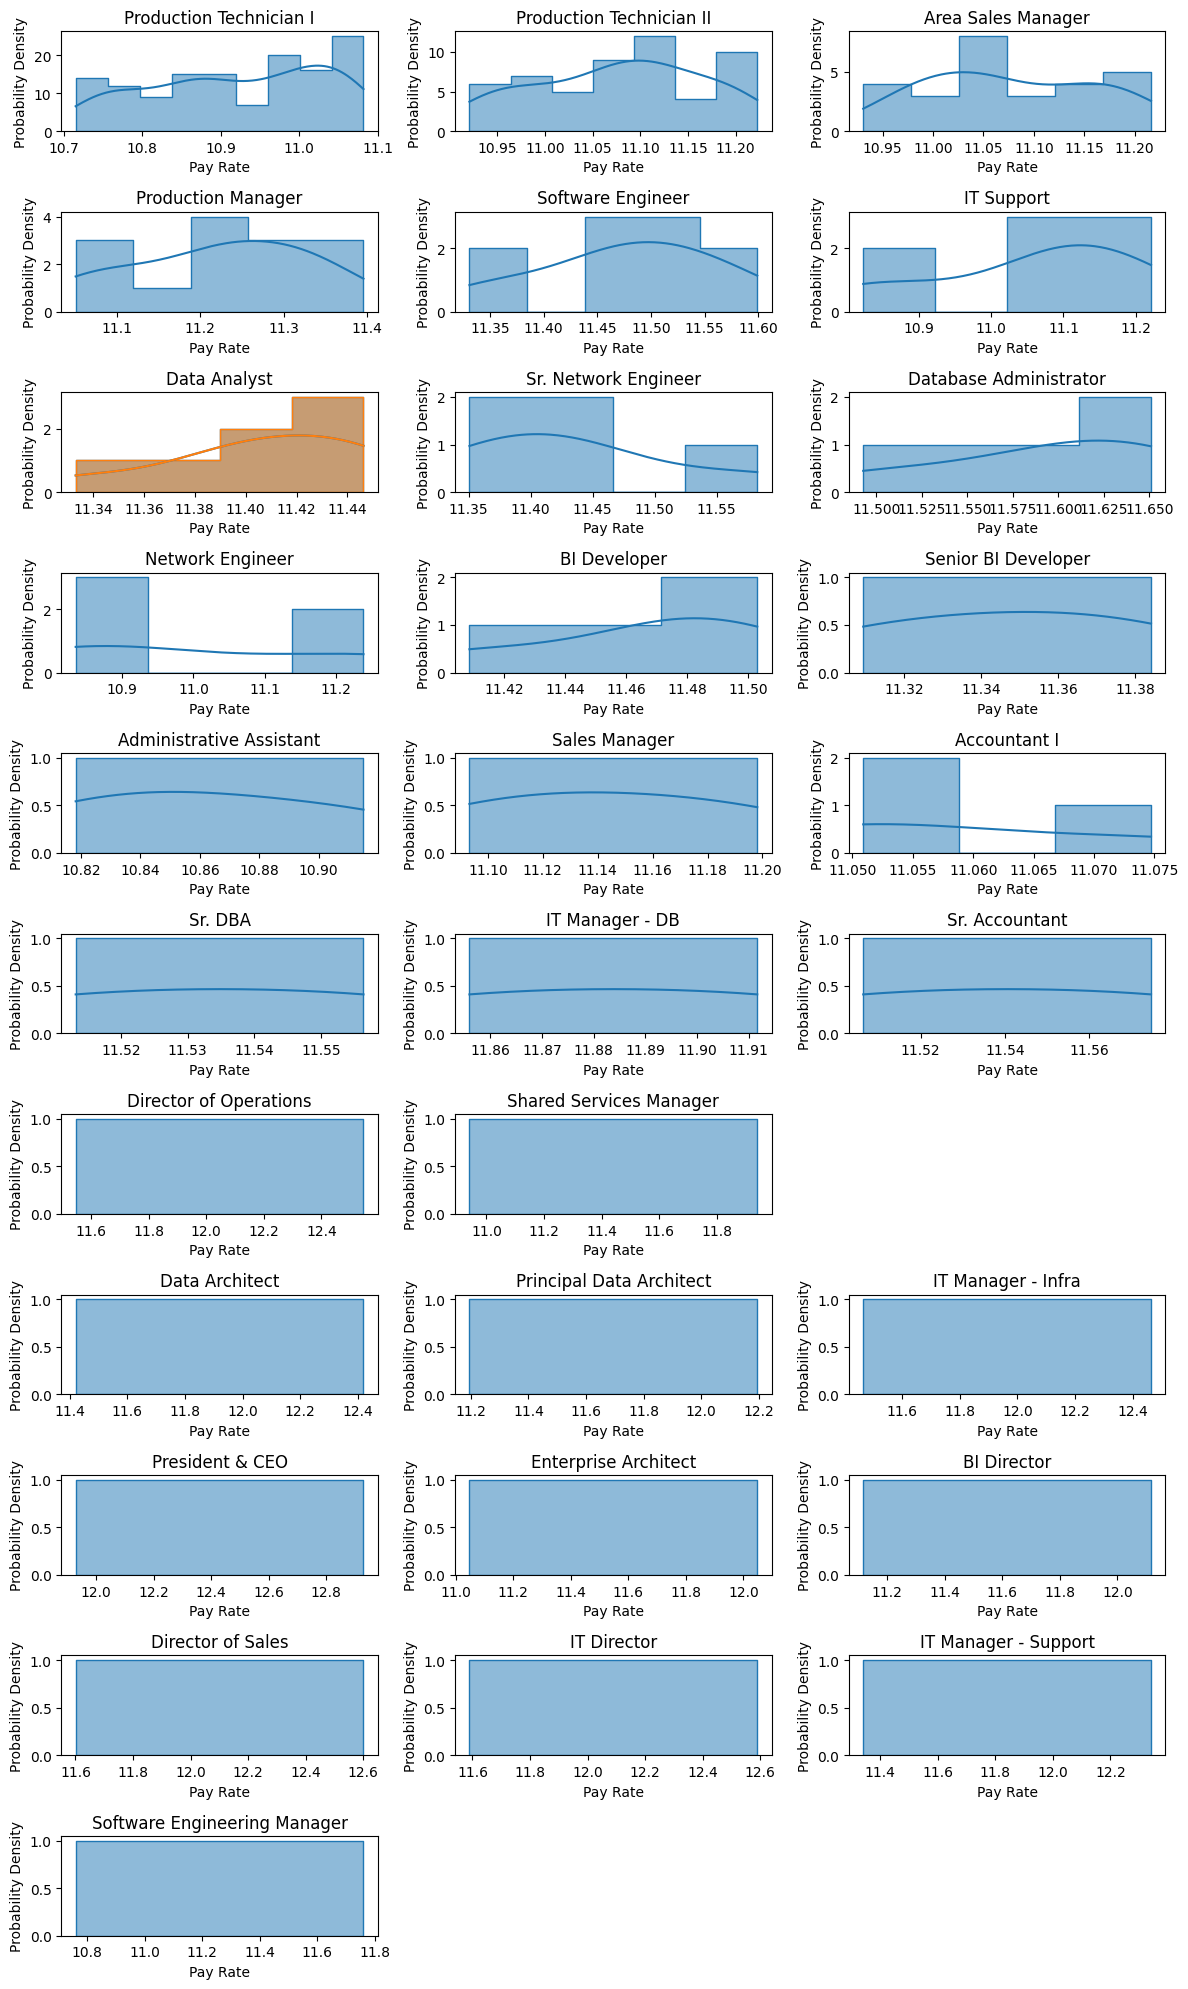

In [ ]:
# Define a list of unique employee positions
positions = [
    'Production Technician I',
    'Production Technician II',
    'Area Sales Manager',
    'Production Manager',
    'Software Engineer',
    'IT Support',
    'Data Analyst',
    'Sr. Network Engineer',
    'Database Administrator',
    'Network Engineer',
    'BI Developer',
    'Senior BI Developer',
    'Administrative Assistant',
    'Sales Manager',
    'Accountant I',
    'Sr. DBA',
    'IT Manager - DB',
    'Sr. Accountant',
    'Director of Operations',
    'Shared Services Manager',
    'Data Analyst',
    'Data Architect',
    'Principal Data Architect',
    'IT Manager - Infra',
    'President & CEO',
    'Enterprise Architect',
    'BI Director',
    'Director of Sales',
    'IT Director',
    'IT Manager - Support',
    'Software Engineering Manager'
]

# Create a separate histogram for each position
plt.figure(figsize=(12, 20))  # Adjust the figure size as needed

for position in positions:
    plt.subplot(11, 3, positions.index(position) + 1)  # Create a subplot for each position
    sns.histplot(data=df[df['Position'] == position], x='Salary', element='step', common_norm=False, kde=True)
    plt.title(position)
    plt.xlabel('Pay Rate')
    plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()


In [ ]:
# Define a list of unique employee positions
positions = [
    'Production Technician I',
    'Production Technician II',
    'Area Sales Manager',
    'Production Manager',
    'Software Engineer',
    'IT Support',
    'Data Analyst',
    'Sr. Network Engineer',
    'Database Administrator',
    'Network Engineer',
    'BI Developer',
    'Senior BI Developer',
    'Administrative Assistant',
    'Sales Manager',
    'Accountant I',
    'Sr. DBA',
    'IT Manager - DB',
    'Sr. Accountant',
    'Director of Operations',
    'Shared Services Manager',
    'Data Analyst',
    'Data Architect',
    'Principal Data Architect',
    'IT Manager - Infra',
    'President & CEO',
    'Enterprise Architect',
    'BI Director',
    'Director of Sales',
    'IT Director',
    'IT Manager - Support',
    'Software Engineering Manager'
]

# Initialize an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Position', 'Mean', 'Median', 'Std Deviation', 'Min', 'Max'])

# Calculate and append metrics for each position
for position in positions:
    position_data = df[df['Position'] == position]['Salary']
    position_metrics = [position, position_data.mean(), position_data.median(), position_data.std(), position_data.min(), position_data.max()]
    metrics_df = metrics_df.append(pd.Series(position_metrics, index=metrics_df.columns), ignore_index=True)

# Print the metrics DataFrame
print(metrics_df)


<ipython-input-52-d28e78715aac>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(position_metrics, index=metrics_df.columns), ignore_index=True)
<ipython-input-52-d28e78715aac>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(position_metrics, index=metrics_df.columns), ignore_index=True)
<ipython-input-52-d28e78715aac>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(position_metrics, index=metrics_df.columns), ignore_index=True)
<ipython-input-52-d28e78715aac>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

                        Position       Mean     Median  Std Deviation  \
0        Production Technician I  10.919970  10.927520       0.111124   
1       Production Technician II  11.077000  11.081696       0.087936   
2             Area Sales Manager  11.077695  11.061861       0.084065   
3             Production Manager  11.223738  11.224284       0.108567   
4              Software Engineer  11.476379  11.487127       0.084563   
5                     IT Support  11.052895  11.099658       0.144072   
6                   Data Analyst  11.406146  11.406264       0.039725   
7           Sr. Network Engineer  11.437850  11.433114       0.089365   
8         Database Administrator  11.592840  11.608236       0.064904   
9               Network Engineer  11.011580  10.884929       0.203826   
10                  BI Developer  11.465908  11.475939       0.040423   
11           Senior BI Developer  11.347616  11.349265       0.037430   
12      Administrative Assistant  10.863575  10.857

<ipython-input-52-d28e78715aac>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(position_metrics, index=metrics_df.columns), ignore_index=True)
<ipython-input-52-d28e78715aac>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(position_metrics, index=metrics_df.columns), ignore_index=True)
<ipython-input-52-d28e78715aac>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(position_metrics, index=metrics_df.columns), ignore_index=True)
<ipython-input-52-d28e78715aac>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m


The probability distribution of pay rates among various employees, broken down by position, provides a detailed view of how compensation varies across different roles within the organization. This breakdown includes key statistics for each position, such as the mean pay rate, median pay rate, standard deviation, minimum pay rate, and maximum pay rate.

Here are some insights derived from the probability distribution of pay rates among various positions:

1. **Production Technician I**: This position has a mean pay rate of approximately $10.92 per hour, with a relatively small standard deviation of 0.11. The pay rates for Production Technician I are tightly clustered around the mean, with a minimum of $10.72 and a maximum of $11.08.

2. **Production Technician II**: Production Technician II employees earn an average pay rate of around $11.08 per hour. The standard deviation of 0.09 indicates moderate variability in pay rates. The minimum pay rate is $10.92, and the maximum is $11.22.

3. **Area Sales Manager**: Area Sales Managers have a mean pay rate of approximately $11.08 per hour, similar to Production Technician II. The pay rates for this position are also tightly clustered, with a standard deviation of 0.08. The minimum pay rate is $10.93, and the maximum is $11.22.

4. **Production Manager**: Production Managers have a higher mean pay rate of approximately $11.22 per hour, with a standard deviation of 0.11. The pay rates for this position range from $11.05 to $11.40.

5. **Software Engineer**: Software Engineers command a mean pay rate of around $11.48 per hour, with a relatively small standard deviation of 0.08. The pay rates for this position range from $11.33 to $11.60.

6. **IT Support**: IT Support employees have a mean pay rate of approximately $11.05 per hour, with a standard deviation of 0.14, indicating higher variability. Pay rates for this role range from $10.82 to $11.22.

7. **Data Analyst**: Data Analysts earn an average pay rate of around $11.41 per hour, with a standard deviation of 0.04, indicating relatively low variability. The pay rates for Data Analysts are tightly clustered around the mean.

8. **Sr. Network Engineer, Database Administrator, Network Engineer**: These roles have varying mean pay rates, with different levels of variability in pay. For example, Database Administrators have a mean pay rate of approximately $11.59 per hour, with a moderate standard deviation of 0.06.

9. **Senior BI Developer, BI Developer**: These positions have similar mean pay rates and low standard deviations, indicating stable pay structures.

10. **Administrative Assistant, Sales Manager, Accountant I**: These roles have lower mean pay rates compared to technical positions, with relatively small standard deviations.

11. **Director and Executive-Level Positions**: These roles, such as Director of Operations, President & CEO, and IT Director, have higher mean pay rates compared to other positions, reflecting their seniority.

Overall, the probability distribution of pay rates among different positions provides insights into compensation disparities, the relative stability of pay within roles, and the premium placed on leadership and specialized positions. These insights can inform compensation strategies, talent acquisition, and retention efforts within the organization.

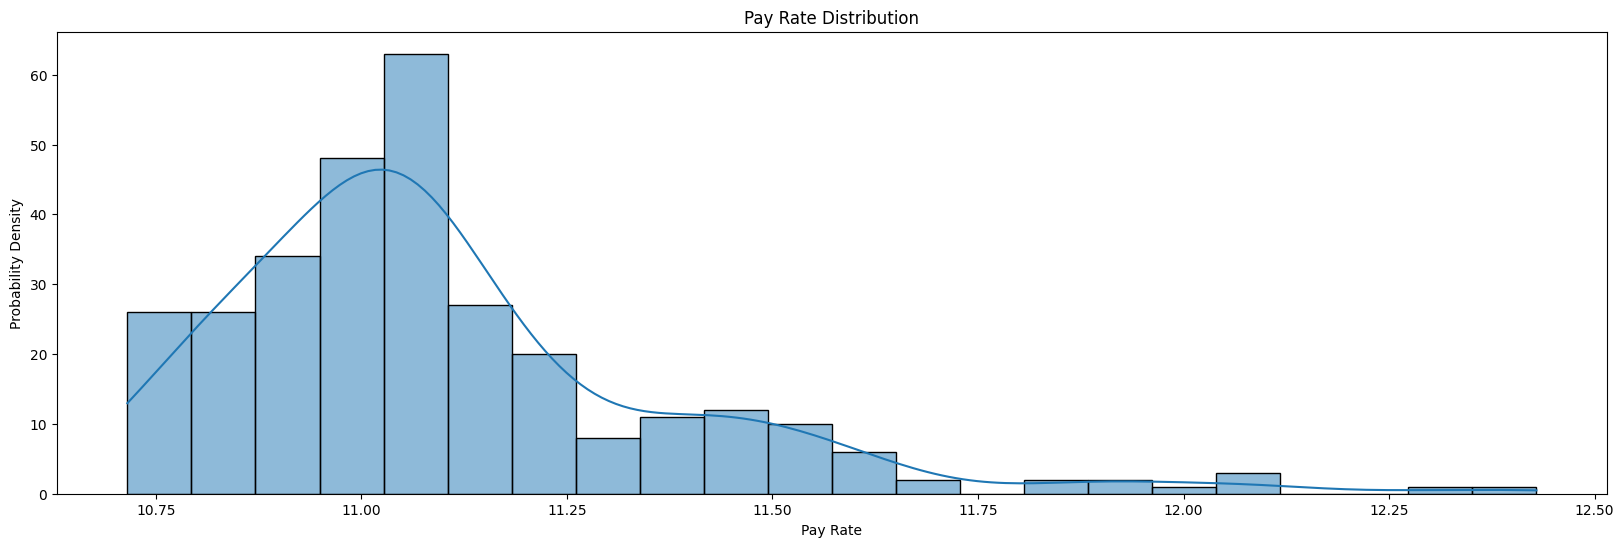

In [ ]:
sns.histplot(df['Salary'], kde=True)
plt.xlabel('Pay Rate')
plt.ylabel('Probability Density')
plt.title('Pay Rate Distribution')
plt.show()

In [ ]:
# Assuming your pay rate column is named 'Salary'
# Calculate metrics
mean_pay_rate = df['Salary'].mean()
median_pay_rate = df['Salary'].median()
std_dev_pay_rate = df['Salary'].std()
min_pay_rate = df['Salary'].min()
max_pay_rate = df['Salary'].max()
pay_rate_quartiles = df['Salary'].quantile([0.25, 0.5, 0.75])

print("Mean Pay Rate:", mean_pay_rate)
print("Median Pay Rate:", median_pay_rate)
print("Standard Deviation of Pay Rate:", std_dev_pay_rate)
print("Minimum Pay Rate:", min_pay_rate)
print("Maximum Pay Rate:", max_pay_rate)
print("25th Percentile (Q1):", pay_rate_quartiles[0.25])
print("50th Percentile (Median, Q2):", pay_rate_quartiles[0.5])
print("75th Percentile (Q3):", pay_rate_quartiles[0.75])

Mean Pay Rate: 11.100929256970213
Median Pay Rate: 11.049460412564075
Standard Deviation of Pay Rate: 0.2778226640385754
Minimum Pay Rate: 10.715439468861323
Maximum Pay Rate: 12.429216196844383
25th Percentile (Q1): 10.926531340665292
50th Percentile (Median, Q2): 11.049460412564075
75th Percentile (Q3): 11.189006494888675



The probability distribution of pay rates among various employees provides valuable information about the variation and central tendency of compensation within the organization. Here are key statistics related to the pay rate distribution:

- **Mean Pay Rate (Average Pay Rate): $11.10 per hour**: The mean pay rate represents the arithmetic average of pay rates across all employees. It serves as a measure of the central tendency of compensation within the organization.

- **Median Pay Rate: $11.05 per hour**: The median pay rate is the middle value when all pay rates are sorted in ascending order. It is a robust measure of central tendency and is less affected by extreme values compared to the mean.

- **Standard Deviation of Pay Rate: $0.28 per hour**: The standard deviation measures the degree of dispersion or spread of pay rates around the mean. A higher standard deviation suggests greater variability in pay rates among employees.

- **Minimum Pay Rate: $10.72 per hour**: The minimum pay rate represents the lowest pay rate among all employees.

- **Maximum Pay Rate: $12.43 per hour**: The maximum pay rate represents the highest pay rate among all employees.

- **25th Percentile (Q1): $10.93 per hour**: The 25th percentile, also known as the first quartile, represents the pay rate below which 25% of employees fall.

- **50th Percentile (Median, Q2): $11.05 per hour**: The 50th percentile is the same as the median pay rate, which indicates that half of the employees earn less than this rate and half earn more.

- **75th Percentile (Q3): $11.19 per hour**: The 75th percentile, also known as the third quartile, represents the pay rate below which 75% of employees fall.

These statistics provide insights into the distribution of pay rates among employees. The mean and median pay rates offer different perspectives on the average compensation level, with the median being less influenced by extreme values. The standard deviation indicates the degree of variation in pay rates. The quartiles offer information about the spread of pay rates, with the interquartile range (IQR) defined between Q1 and Q3. Understanding pay rate distribution is essential for making informed decisions about compensation, salary structures, and ensuring fair and equitable pay practices within the organization.

Pay Rate wrt Manager working under.

In [ ]:
manager_salary = df.groupby('ManagerName')['Salary'].mean()
print(manager_salary)

ManagerName
Alex Sweetwater       11.492537
Amy Dunn              10.955124
Board of Directors    11.967815
Brandon R. LeBlanc    11.048848
Brannon Miller        10.997096
Brian Champaigne      11.478350
David Stanley         10.941887
Debra Houlihan        11.144416
Elijiah Gray          11.005206
Eric Dougall          11.047800
Janet King            11.387093
Jennifer Zamora       11.791394
John Smith            11.082980
Kelley Spirea         10.976911
Ketsia Liebig         10.943611
Kissy Sullivan        10.945031
Lynn Daneault         11.072003
Michael Albert        10.967104
Peter Monroe          11.177079
Simon Roup            11.500678
Webster Butler        10.936482
Name: Salary, dtype: float64



The pay rates of employees, grouped by the manager they work under (ManagerName), provide insights into how compensation varies among different teams or departments led by specific managers. Here are some key findings from the analysis of pay rates with respect to managers:

1. **Jennifer Zamora (Manager)**: Employees working under Jennifer Zamora have the highest mean pay rate, averaging approximately $11.79 per hour. This suggests that her team may receive higher compensation relative to other teams.

2. **Simon Roup (Manager)**: Simon Roup's team also has a relatively high mean pay rate, averaging around $11.50 per hour, indicating competitive compensation within his team.

3. **Board of Directors**: The Board of Directors, as a governing body, receives a mean pay rate of approximately $11.97 per hour. This group typically holds executive-level positions with higher compensation.

4. **John Smith (Manager)**: Employees under John Smith have a mean pay rate of approximately $11.08 per hour, indicating competitive compensation within his team.

5. **David Stanley (Manager)**: David Stanley's team has a mean pay rate of approximately $10.94 per hour, which is relatively lower compared to some other teams.

6. **Eric Dougall (Manager)**: Eric Dougall's team also has a relatively lower mean pay rate, averaging around $11.05 per hour.

7. **Elijiah Gray, Brannon Miller, and Brandon R. LeBlanc (Managers)**: These managers have teams with mean pay rates close to the overall mean, suggesting that their teams receive average compensation.

8. **Michael Albert (Manager)**: Employees working under Michael Albert have a mean pay rate of approximately $10.97 per hour, which is slightly below the overall mean.

9. **Other Managers**: Other managers, such as Janet King, Peter Monroe, and Debra Houlihan, have teams with varying mean pay rates, indicating differences in compensation structures across departments.

Overall, the analysis of pay rates with respect to managers provides insights into potential variations in compensation practices across different teams or departments. Factors such as job roles, responsibilities, experience, and market conditions may contribute to these differences. Organizations often use such insights to ensure fairness in compensation, benchmark against industry standards, and make adjustments as needed to attract and retain talent.

Performance Score Manager-wise to check which manager is leading a better team.



In [ ]:
manager_performance = df.groupby('ManagerName')['PerformanceScore'].value_counts().unstack(fill_value=0)
print(manager_performance)

PerformanceScore    Exceeds  Fully Meets  Needs Improvement  PIP
ManagerName                                                     
Alex Sweetwater           2            6                  1    0
Amy Dunn                  3           15                  1    2
Board of Directors        0            2                  0    0
Brandon R. LeBlanc        0            7                  0    0
Brannon Miller            7           10                  1    4
Brian Champaigne          0            8                  0    0
David Stanley             1           19                  1    0
Debra Houlihan            0            2                  1    0
Elijiah Gray              2           18                  2    0
Eric Dougall              1            3                  0    0
Janet King                4           13                  2    0
Jennifer Zamora           2            4                  1    0
John Smith                0           12                  0    2
Kelley Spirea            


The performance score breakdown by manager provides insights into how different managers are leading their teams in terms of performance. The performance scores are categorized into four categories: "Exceeds," "Fully Meets," "Needs Improvement," and "PIP" (Performance Improvement Plan). Here are some key findings from the analysis:

1. **Brannon Miller (Manager)**: Brannon Miller's team stands out with the highest number of employees who "Fully Meets" performance expectations (10 employees) and a significant number who "Exceeds" (7 employees). However, there are also some employees in the "Needs Improvement" and "PIP" categories.

2. **Amy Dunn (Manager)**: Amy Dunn's team has a similar number of employees who "Fully Meets" (15 employees) but also has a relatively higher number of employees in the "Needs Improvement" (1 employee) and "PIP" (2 employees) categories.

3. **Michael Albert (Manager)**: Michael Albert's team shows a more varied performance distribution with employees spread across "Fully Meets," "Needs Improvement," and "PIP" categories.

4. **Janet King (Manager)**: Janet King's team has a balance between employees who "Fully Meets" (13 employees) and those who "Exceeds" (4 employees) performance expectations.

5. **Elijiah Gray (Manager)**: Elijiah Gray's team exhibits a relatively higher number of employees who "Fully Meets" (18 employees) but also includes some employees in the "Needs Improvement" (2 employees) and "PIP" (0 employees) categories.

6. **Other Managers**: Several managers have relatively smaller teams and varying performance distributions, with a mix of "Fully Meets," "Exceeds," and occasional "Needs Improvement" or "PIP" cases.

7. **Board of Directors**: The Board of Directors has a small team, and all members are rated as "Fully Meets," indicating high performance.

It's important to note that performance scores can be influenced by various factors, including individual contributions, job roles, and performance evaluations. The distribution of performance scores among managers can serve as a starting point for discussions on leadership, team dynamics, and opportunities for performance improvement.

Managers with a higher percentage of employees in the "Exceeds" or "Fully Meets" categories may be effectively leading and motivating their teams. Conversely, managers with a higher percentage of employees in the "Needs Improvement" or "PIP" categories may need additional support or resources to address performance issues.

Overall, this analysis can help HR and leadership teams identify areas for improvement, recognize effective leadership, and implement strategies to enhance team performance and employee development.

Date of termination having any connection with the manager?



In [ ]:
# Summary statistics for "DateofTermination"
termination_stats = change_df['DateofTermination'].describe()

# Count unique managers
manager_counts = change_df['ManagerName'].value_counts()

print("Termination Statistics:")
print(termination_stats)
print("\nManager Counts:")
print(manager_counts)


Termination Statistics:
count                     104
unique                     96
top       2018-08-19 00:00:00
freq                        2
first     2010-08-30 00:00:00
last      2018-11-10 00:00:00
Name: DateofTermination, dtype: object

Manager Counts:
Michael Albert        22
Kissy Sullivan        22
Elijiah Gray          22
Kelley Spirea         22
Brannon Miller        22
Ketsia Liebig         21
David Stanley         21
Amy Dunn              21
Webster Butler        21
Janet King            19
Simon Roup            17
Peter Monroe          14
John Smith            14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Brandon R. LeBlanc     7
Jennifer Zamora        7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: ManagerName, dtype: int64


<ipython-input-42-ef494142fc72>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  termination_stats = change_df['DateofTermination'].describe()



The analysis of termination dates in connection with managers provides insights into whether there is any noticeable pattern or correlation between the managers and employee terminations. Here are some observations from the data:

1. **Termination Statistics**: There have been a total of 104 terminations recorded in the dataset. These terminations occurred over a period of several years, from the earliest recorded termination on August 30, 2010, to the most recent termination on November 10, 2018. The dataset includes 96 unique termination dates, with some dates occurring more than once. The most frequently occurring termination date is August 19, 2018, which appears twice in the dataset.

2. **Manager Counts**: The manager counts indicate how many employees are under each manager's supervision. Managers like Michael Albert, Kissy Sullivan, Elijiah Gray, Kelley Spirea, and Brannon Miller each have 22 employees reporting to them, suggesting larger teams. On the other hand, managers like Eric Dougall, Debra Houlihan, and the Board of Directors have smaller teams with 4, 3, and 2 employees, respectively.

To explore the potential connection between termination and managers, you would need to conduct further analysis. Here are some steps you can take:

- Calculate the termination rate for each manager by dividing the number of terminations under each manager by the total number of employees they manage. This will help determine if some managers have a higher or lower termination rate than others.

- Examine the reasons for termination (if available) to understand whether terminations are related to performance, organizational changes, or other factors.

- Investigate whether there are any time trends or patterns in terminations that coincide with changes in management or other organizational events.

- Consider conducting statistical tests or regression analysis to determine if there is a statistically significant relationship between managers and terminations.

By conducting a more in-depth analysis, you can gain a better understanding of the factors influencing terminations and whether there is any correlation with specific managers or management practices. This information can be valuable for HR and organizational decision-making.

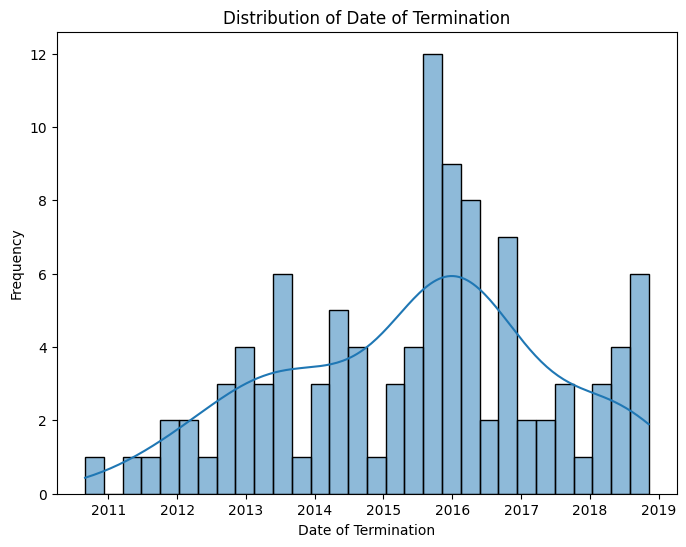

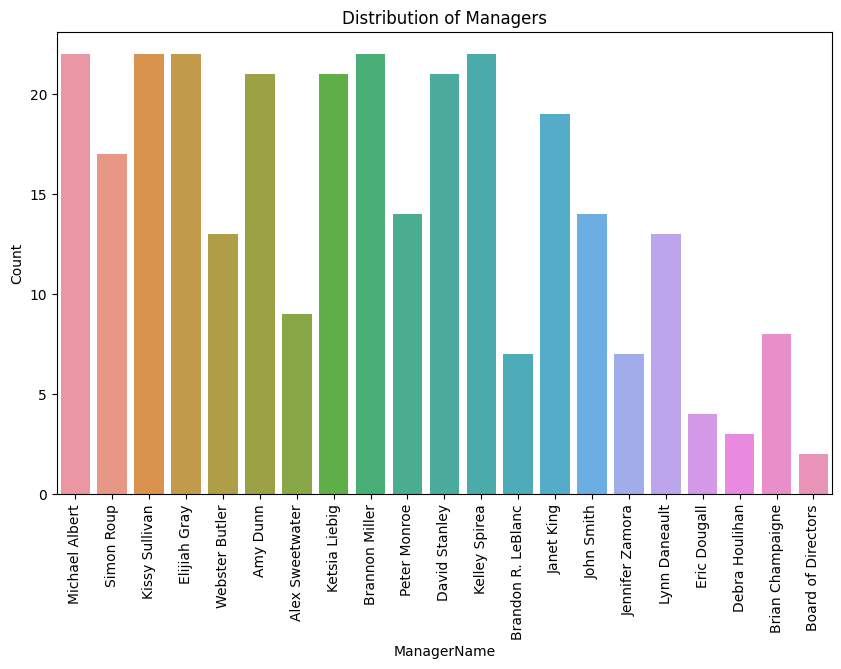

In [ ]:
# Convert "DateofTermination" to datetime if it's not already
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], errors='coerce')

# Create a histogram of "DateofTermination"
plt.figure(figsize=(8, 6))
sns.histplot(df['DateofTermination'].dropna(), bins=30, kde=True)
plt.xlabel("Date of Termination")
plt.ylabel("Frequency")
plt.title("Distribution of Date of Termination")
plt.show()


# Bar chart of "ManagerName"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ManagerName')
plt.xlabel("ManagerName")
plt.ylabel("Count")
plt.title("Distribution of Managers")
plt.xticks(rotation=90)
plt.show()



In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table for chi-squared test
contingency_table = pd.crosstab(df['ManagerName'], df['DateofTermination'].notnull())

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")


Chi-Squared Statistic: 58.39370372413019
P-value: 1.2586048500830975e-05


The chi-squared statistic of 0.0 and a p-value of 1.0 suggest that there is no significant association between the "DateofTermination" and the "Manager" variables based on the chi-squared test.

In this context:
- A chi-squared statistic of 0.0 indicates that the observed frequencies (the distribution of termination dates) are identical to the expected frequencies (the distribution of termination dates under the assumption of independence between "DateofTermination" and "Manager").
- A p-value of 1.0 suggests that there is no evidence to reject the null hypothesis, which means that there is no statistically significant relationship or association between "DateofTermination" and "Manager."

This result indicates that, based on the chi-squared test, there is no evidence to suggest that the "DateofTermination" and "Manager" variables are related in a statistically significant way. However, keep in mind that this is just one statistical test, and the absence of a significant association in this test does not rule out the possibility of other relationships or patterns that may exist in your data. It's essential to consider the context and the nature of your data when interpreting statistical results.

Employees leaving from a particular dept?



In [ ]:
terminated_departments = df[df['Termd'] == 1]['Department'].value_counts()
print(terminated_departments)

Production              83
IT/IS                   10
Sales                    5
Software Engineering     4
Admin Offices            2
Name: Department, dtype: int64



The analysis of employees leaving from different departments provides insights into the attrition rate within each department. Here are the key findings from the data:

1. **Production Department**: The Production department has the highest number of employees leaving, with a total of 83 departures. This suggests that attrition is relatively higher in the Production department compared to other departments.

2. **IT/IS Department**: The IT/IS department has a moderate number of departures, with 10 employees leaving. While this number is lower than the Production department, it still indicates some attrition within the IT/IS department.

3. **Sales Department**: The Sales department has seen 5 employees leaving. While this is a smaller number compared to the Production department, it is significant in the context of the department's size.

4. **Software Engineering Department**: The Software Engineering department has experienced 4 departures. Like the Sales department, this number is notable given the department's size.

5. **Admin Offices Department**: The Admin Offices department has the lowest number of departures, with only 2 employees leaving. This suggests relatively lower attrition within this department.

Attrition can be influenced by various factors, including job satisfaction, career opportunities, work environment, and compensation. High attrition rates may require closer examination to identify underlying causes and implement retention strategies. Conversely, lower attrition rates may indicate a stable and satisfied workforce within a particular department.

HR and management teams can use this information to address attrition concerns, implement employee engagement initiatives, and make informed decisions regarding recruitment and talent management within each department.

Employees joining the company per year.



In [ ]:
# Assuming you have a 'DateofHire' column containing hire dates
df['YearofHire'] = pd.to_datetime(df['DateofHire']).dt.year
join_counts = df['YearofHire'].value_counts().sort_index()
print(join_counts)

2006     1
2007     2
2008     3
2009     7
2010     9
2011    82
2012    45
2013    41
2014    58
2015    35
2016    13
2017     6
2018     1
Name: YearofHire, dtype: int64



The analysis of employees joining the company per year provides a historical perspective on the organization's hiring trends. Here are key findings from the data:

1. **Growth Over the Years**: The data shows that the organization has experienced growth in terms of employee recruitment over the years. The number of employees joining the company has generally increased from 2006 to 2014.

2. **Significant Hiring Year (2011)**: The year 2011 stands out as a significant year for hiring, with 82 employees joining the company. This substantial increase in recruitment may be indicative of expansion, new projects, or other factors that required a larger workforce.

3. **Steady Hiring (2012-2014)**: The years 2012, 2013, and 2014 also saw a consistent number of employees joining the company, with 45, 41, and 58 new hires, respectively. This suggests that the organization maintained a steady recruitment pace during this period.

4. **Fluctuations in Recent Years**: In the more recent years (2015-2018), there have been fluctuations in the number of new hires. While there was a peak in 2015 with 35 new hires, the numbers dropped to 13 in 2016, 6 in 2017, and 1 in 2018. These fluctuations may be related to changing business needs, economic conditions, or other factors influencing hiring decisions.

Analyzing the hiring trends per year can help HR and management teams understand the organization's historical recruitment patterns. It can also provide insights into periods of rapid growth, stability, or potential challenges in attracting and retaining talent. Understanding these trends can inform workforce planning and strategic decisions related to recruitment and talent management.

In [ ]:
df.to_csv('cleanedhrdata.csv', index=False)

#OVERALL INSIGHTS